# Word frequencies

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read CSV file into DataFrame df
# debates and mep info combined
df = pd.read_csv("C:\\Users\\Katharina\\Documents\\Uni\\6_WS2223\\Masterarbeit\\code\\WomenInEP\\data\\csv\\debates_meps_combined.csv", index_col=0)
# Show dataframe
df.head()

,int_id,debate_id,speaker,is_mep,text,speaker_id,role,party,text_translated,language,full Name,country,EU political group,national political group,nationalty,gender,birth_year,birth_place,political_groups,national_parties
0,2-008-000,20140701.EN,Presidente,True,Ringrazio il maestro e tutta l'orchestra. Ric...,4436,NaN,NaN,I thank the master and the whole orchestra.I r...,it,NaN,NaN,NaN,NaN,Italy,M,1958,Lauria (PZ),20-07-1999 / 19-07-2004 : Group of the Party o...,20-07-1999 / 19-07-2004 : Democratici di Sinis...
1,2-009-000,20140701.EN,Pablo Iglesias Turrión,True,"Señor Presidente, es un honor dirigirme a ust...",125031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain,M,1978,Madrid,01-07-2014 / 27-10-2015 : Confederal Group of ...,01-07-2014 / 27-10-2015 : PODEMOS (Spain)
2,2-010-000,20140701.EN,Sajjad Karim,True,"Mr President, I rise to speak with a sense of...",28481,NaN,NaN,"Mr President, I rise to speak with a sense of ...",en,NaN,NaN,NaN,NaN,United Kingdom,M,1970,Lancashire,20-07-2004 / 11-12-2007 : Group of the Allianc...,20-07-2004 / 13-07-2009 : UK Independence Part...
3,2-011-000,20140701.EN,Ulrike Lunacek,True,"Mr President, firstly let me welcome all the ...",97017,NaN,NaN,"Mr President, firstly let me welcome all the n...",en,NaN,NaN,NaN,NaN,Austria,F,1957,Krems a.d. Donau,14-07-2009 / 04-02-2013 : Group of the Greens/...,14-07-2009 / 30-06-2014 : Die Grünen - Die Grü...
4,2-013-000,20140701.EN,Martin Schulz,True,"Herr Präsident, meine sehr geehrten Damen und...",1911,NaN,NaN,"Mr. President, my dear ladies and gentlemen, d...",de,NaN,NaN,NaN,NaN,Germany,M,1955,Hehlrath,19-07-1994 / 19-07-1999 : Group of the Party o...,19-07-1994 / 19-07-1999 : Sozialdemokratische ...


## extracting date from debate_id

In [3]:
date=df.debate_id.str.extract('(^\d*)')
df.insert (2, "date", date)
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

## getting an overview of dataset

In [4]:
df.language.nunique()

30

In [5]:
df_original = df # as a backup

## How many interventions of each debate? How many debates in total? --> 463, cross checked for #of interventions per debate

In [6]:
frequence_debate_id = df.debate_id.value_counts()
frequence_language = df.language.value_counts()

In [7]:
print(frequence_debate_id)
print(frequence_language)

20160428.EN    9003
20150429.EN    6616
20151215.EN    4022
20150709.EN    3886
20160412.EN    3667
               ... 
20201023.EN       5
20170116.EN       3
20210521.EN       3
20200309.EN       3
20140703.EN       1
Name: debate_id, Length: 463, dtype: int64
en     56560
fr     37422
it     27625
es     24934
de     21694
el     12787
pt     12582
hu     10303
pl      9709
hr      8577
ro      6863
cs      6177
sk      5751
nl      5079
sl      4490
lt      4284
bg      2948
sv      2546
bs      2048
fi      1755
et      1187
lv      1113
da      1100
mt       607
ga       437
ilo        8
la         2
gn         1
tr         1
om         1
Name: language, dtype: int64


In [8]:
df['language'].isna().sum()

6505

NaN's in column 'language' in whole DF: 6505/275096=0,024 (2.4%)

### data frame only with NaN's of 'language': 6505 (2,4%)

In [9]:
df_w_na = df[df['language'].isna()]
print(df_w_na)

            int_id    debate_id       date                 speaker  is_mep  \
1        2-009-000  20140701.EN 2014-07-01  Pablo Iglesias Turrión    True   
8        2-018-250  20140701.EN 2014-07-01           Der Präsident    True   
25       3-010-000  20140702.EN 2014-07-02       Herman Van Rompuy    True   
26       3-011-000  20140702.EN 2014-07-02     José Manuel Barroso    True   
77       3-065-000  20140702.EN 2014-07-02       Herman Van Rompuy    True   
...            ...          ...        ...                     ...     ...   
275048  3-319-2500  20220216.EN 2022-02-16           Laura Ferrara    True   
275051  3-322-0000  20220216.EN 2022-02-16         Didier Reynders    True   
275056  3-329-0000  20220216.EN 2022-02-16       Marco Campomenosi    True   
275073  3-347-0000  20220216.EN 2022-02-16         Didier Reynders    True   
275078  3-354-0000  20220216.EN 2022-02-16     Giuseppe Ferrandino    True   

                                                     text     s

In [10]:
#df_wo_na.to_csv('not_translated.csv')

## 'DF' changed: excluding NaN's of 'language': 268591 (97,6%)

In [11]:
#df = df_original #only use to reset 'df'
df = df.loc[~df['language'].isna()]

In [12]:
#df = df.loc[~df['language'].isna()]

In [13]:
df #268591 from 275096

,int_id,debate_id,date,speaker,is_mep,text,speaker_id,role,party,text_translated,...,full Name,country,EU political group,national political group,nationalty,gender,birth_year,birth_place,political_groups,national_parties
0,2-008-000,20140701.EN,2014-07-01,Presidente,True,Ringrazio il maestro e tutta l'orchestra. Ric...,4436,NaN,NaN,I thank the master and the whole orchestra.I r...,...,NaN,NaN,NaN,NaN,Italy,M,1958,Lauria (PZ),20-07-1999 / 19-07-2004 : Group of the Party o...,20-07-1999 / 19-07-2004 : Democratici di Sinis...
2,2-010-000,20140701.EN,2014-07-01,Sajjad Karim,True,"Mr President, I rise to speak with a sense of...",28481,NaN,NaN,"Mr President, I rise to speak with a sense of ...",...,NaN,NaN,NaN,NaN,United Kingdom,M,1970,Lancashire,20-07-2004 / 11-12-2007 : Group of the Allianc...,20-07-2004 / 13-07-2009 : UK Independence Part...
3,2-011-000,20140701.EN,2014-07-01,Ulrike Lunacek,True,"Mr President, firstly let me welcome all the ...",97017,NaN,NaN,"Mr President, firstly let me welcome all the n...",...,NaN,NaN,NaN,NaN,Austria,F,1957,Krems a.d. Donau,14-07-2009 / 04-02-2013 : Group of the Greens/...,14-07-2009 / 30-06-2014 : Die Grünen - Die Grü...
4,2-013-000,20140701.EN,2014-07-01,Martin Schulz,True,"Herr Präsident, meine sehr geehrten Damen und...",1911,NaN,NaN,"Mr. President, my dear ladies and gentlemen, d...",...,NaN,NaN,NaN,NaN,Germany,M,1955,Hehlrath,19-07-1994 / 19-07-1999 : Group of the Party o...,19-07-1994 / 19-07-1999 : Sozialdemokratische ...
5,2-014-000,20140701.EN,2014-07-01,Beatrix von Storch,True,Herr Präsident! Mein Name ist Beatrix von Sto...,124825,NaN,NaN,Mister President!My name is Beatrix von Storch...,...,NaN,NaN,NaN,NaN,Germany,F,1971,Lübeck,01-07-2014 / 07-04-2016 : European Conservativ...,01-07-2014 / 23-10-2017 : Alternative für Deut...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275091,3-368-0000,20220216.EN,2022-02-16,Ciarán Cuffe,True,"A Uachtarán, I dtús báire, bhí an togra Eurov...",197654,NaN,NaN,"His president, initially, was the Eurovignette...",...,Ciarán CUFFE,Ireland,Group of the Greens/European Free Alliance,Green Party,Ireland,M,1963,Dublin,02-07-2019 ... : Group of the Greens/European ...,02-07-2019 ... : Green Party (Ireland)
275092,3-369-0000,20220216.EN,2022-02-16,Sēdes vadītājs,True,"Liels paldies! Un tiešām gandarījums, ka Eiro...",28615,NaN,NaN,"Thank you very much!And indeed, the European U...",...,Roberts ZĪLE,Latvia,European Conservatives and Reformists Group,"Nacionālā apvienība ""Visu Latvijai!""-""Tēvzemei...",Latvia,M,1958,Rīga,20-07-2004 / 13-11-2004 : Union for Europe of ...,20-07-2004 / 13-07-2009 : Tēvzemei un Brīvībai...
275093,3-370-0000,20220216.EN,2022-02-16,Helena Dalli,True,"Mr President, it’s good to hear that many of ...",photo_generic,Member of the Commission,NaN,"Mr President, it’s good to hear that many of y...",...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
275094,3-371-0000,20220216.EN,2022-02-16,Sēdes vadītājs,True,"Debates ir beigušās par šo tematu, un es grib...",28615,NaN,NaN,"The debate has ended on this topic, and I want...",...,Roberts ZĪLE,Latvia,European Conservatives and Reformists Group,"Nacionālā apvienība ""Visu Latvijai!""-""Tēvzemei...",Latvia,M,1958,Rīga,20-07-2004 / 13-11-2004 : Union for Europe of ...,20-07-2004 / 13-07-2009 : Tēvzemei un Brīvībai...


## Counting word frequencies within 'text_translated'

In [14]:
# Iran Revolution
df = df.assign(iran_revolution = df.text_translated.values)
patternx1 = r"woman.life.freedom|women.life.freedom|women.in.iran|woman.in.iran|iran.revolution|mahsa.amini|jina.amini|compulsory.hijab|guidance.patrol|zahedan.massacre|protests.in.iran|iran.uprising" 
df['iran_revolution'] = df.iran_revolution.apply(lambda x:len(re.findall(patternx1, str(x), flags=re.IGNORECASE)))

In [15]:
# woman, lady, female
df = df.assign(women = df.text_translated)
pattern1 = r"women|woman|woman's|women's|womans|womens|female|females|girl|mother" 
#lady|ladies rausnehmen, wegen ansprache - TEST
df['women'] = df.women.apply(lambda x:len(re.findall(pattern1, str(x), flags=re.IGNORECASE)))

In [16]:
# gender pay gap, gender wage gap
df = df.assign(gender_pay_gap = df.text_translated)
pattern2 = r"gender.pay.gap|gender.wage.gap|pension.gap|glass.ceiling|occupational.segregation|motherhood.penalty|equal.pay.day" 
df['gender_pay_gap'] = df.gender_pay_gap.apply(lambda x:len(re.findall(pattern2, str(x), flags=re.IGNORECASE)))

In [17]:
# equality, equal opportunities
df = df.assign(equality = df.text_translated)
pattern3 = r"equality|equal.opportunities|sexism|gender.discrimination|feminism|gender.role" 
df['equality'] = df.equality.apply(lambda x:len(re.findall(pattern3, str(x), flags=re.IGNORECASE)))

In [18]:
# care work
df = df.assign(care_work = df.text_translated)
pattern4 = r"care.work|care.tasks|care.reponsibilities|caregiving.responsibilities|domestic.chores|domestic.duties|house.work|child.care|unpaid.work|reproductive.work|domestic.work|division.of.labour|division.of.labor|parental.leave|maternity.leave|paternity.leave|stay-at-home|domestic.economy" 
df['care_work'] = df.care_work.apply(lambda x:len(re.findall(pattern4, str(x), flags=re.IGNORECASE)))

In [19]:
# abortion
df = df.assign(abortion = df.text_translated)
pattern5 = r"abortion|miscarriage|premature.birth|miscarry|feticide|foeticide|stillbirth|reproductive.health|reproductive.right|my.body.my.choice|METOO|metoo|pro-life|pro-choice|pregnancy.termination|terminate.the.pregnancy|reproductive.right|unwanted.pregnancy|forced.birth" 
df['abortion'] = df.abortion.apply(lambda x:len(re.findall(pattern5, str(x), flags=re.IGNORECASE)))

In [20]:
# women's rights
df = df.assign(women_rights = df.text_translated)
pattern6 = r"women*.right*|woman*.right*|woman's.right*|women's.right*|womans.right*|womens.right*" 
df['women_rights'] = df.women_rights.apply(lambda x:len(re.findall(pattern6, str(x), flags=re.IGNORECASE)))

In [21]:
# for exact words, use \b...\b - otherwise, men|man also returns MANdate, MANy, MENtion,...
df = df.assign(men = df.text_translated)
pattern7 = r"\bmen\b|\bman\b|\bman's\b|\bmen's\b|\bmans\b|\bmens\b|\bmale\b|\bguy\b|\bboy\b|\bfather\b" 
df['men'] = df.men.apply(lambda x:len(re.findall(pattern7, str(x), flags=re.IGNORECASE)))

In [22]:
# people
df = df.assign(people = df.text_translated)
pattern8 = r"human|person||individual|people|resident|population" 
df['people'] = df.people.apply(lambda x:len(re.findall(pattern8, str(x), flags=re.IGNORECASE)))

In [23]:
# roe v wade
df = df.assign(Roe_v_Wade = df.text_translated)
pattern9 = r"Roe.v..Wade|Roe.versus.Wade|roe-v-wade|constitutional.right.to.an.abortion|constitutional.right.to.abortion|pro-life|pro-choice" 
df['Roe_v_Wade'] = df.Roe_v_Wade.apply(lambda x:len(re.findall(pattern9, str(x), flags=re.IGNORECASE)))

In [24]:
#extracting the first result for translated tex within df where xx is > 0
df.loc[df['Roe_v_Wade']>0, 'text_translated'].iloc[0]

"Maybe I'll start with the answer, because Mrs. In 'T Veld did not answer my question.Let me remind you that the right to such a free choice you were talking about was conducted in Poland in 1942. You can check in Wikipedia what times it was.We in Poland had times of free choice, for a very long time.I remember the times when it was said in Poland that removing pregnancy was like removing a tooth.And democratic Poland after 1989 broke with this practice, because it was a totalitarian practice, the practice of a totalitarian state based on a lack of respect for life.In Poland, today we have no problem violating women's rights.And this debate clearly showed it.In Poland, like everywhere in the world, there is a serious moral and legal problem, namely the dramatic issue of abortion.And the state here say that this matter is not dramatic, that it does not follow anything.However, in my opinion this problem results from the conflict of two principles that both the state and we recognize, na

In [25]:
df_orig_w_counts = df #as a backup

In [26]:
df.head()

,int_id,debate_id,date,speaker,is_mep,text,speaker_id,role,party,text_translated,...,iran_revolution,women,gender_pay_gap,equality,care_work,abortion,women_rights,men,people,Roe_v_Wade
0,2-008-000,20140701.EN,2014-07-01,Presidente,True,Ringrazio il maestro e tutta l'orchestra. Ric...,4436,NaN,NaN,I thank the master and the whole orchestra.I r...,...,0,0,0,0,0,0,0,0,2976,0
2,2-010-000,20140701.EN,2014-07-01,Sajjad Karim,True,"Mr President, I rise to speak with a sense of...",28481,NaN,NaN,"Mr President, I rise to speak with a sense of ...",...,0,0,0,0,0,0,0,0,4467,0
3,2-011-000,20140701.EN,2014-07-01,Ulrike Lunacek,True,"Mr President, firstly let me welcome all the ...",97017,NaN,NaN,"Mr President, firstly let me welcome all the n...",...,0,1,0,0,0,0,0,0,4050,0
4,2-013-000,20140701.EN,2014-07-01,Martin Schulz,True,"Herr Präsident, meine sehr geehrten Damen und...",1911,NaN,NaN,"Mr. President, my dear ladies and gentlemen, d...",...,0,1,0,0,0,0,0,1,3479,0
5,2-014-000,20140701.EN,2014-07-01,Beatrix von Storch,True,Herr Präsident! Mein Name ist Beatrix von Sto...,124825,NaN,NaN,Mister President!My name is Beatrix von Storch...,...,0,0,0,0,0,0,0,0,547,0


# Vizualisation of topics

<AxesSubplot: xlabel='date'>

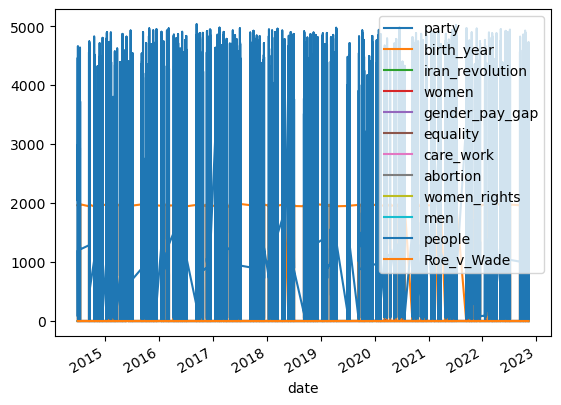

In [27]:
# all numericalvariables
df.plot(kind='line', x='date')

In [28]:
# GROUP BY date
df_summed = df.groupby(by="date").sum()
df_summed = df_summed.drop('is_mep', axis=1)
df_summed = df_summed.drop('party', axis=1)
df_summed = df_summed.drop('birth_year', axis=1)
df_summed = df_summed.drop('people', axis=1) #too many
df_summed

C:\Users\Katharina\AppData\Local\Temp\ipykernel_11876\3845429656.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_summed = df.groupby(by="date").sum()


,iran_revolution,women,gender_pay_gap,equality,care_work,abortion,women_rights,men,Roe_v_Wade
date,,,,,,,,,
2014-07-01,0,2,0,0,0,0,0,1,0
2014-07-02,0,13,1,5,1,0,1,11,0
2014-07-03,0,0,0,0,0,0,0,0,0
2014-07-14,0,0,0,0,0,1,0,1,0
2014-07-15,0,146,3,28,66,0,7,23,0
...,...,...,...,...,...,...,...,...,...
2022-10-18,0,41,0,20,0,1,1,12,0
2022-10-19,1,220,0,26,0,4,11,40,0
2022-10-20,0,6,0,0,0,0,0,8,0


<AxesSubplot: xlabel='date'>

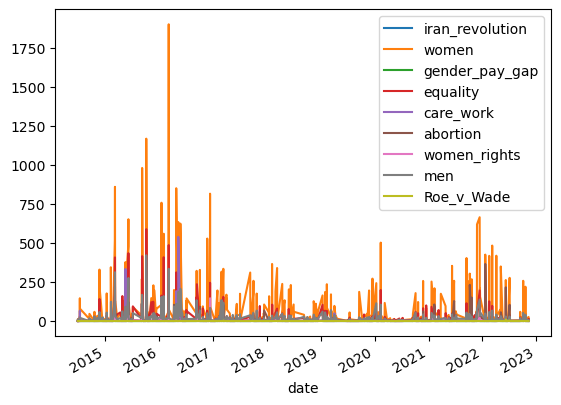

In [29]:
df_summed.plot(kind='line')
#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/all_by_year2.png')

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >], dtype=object)

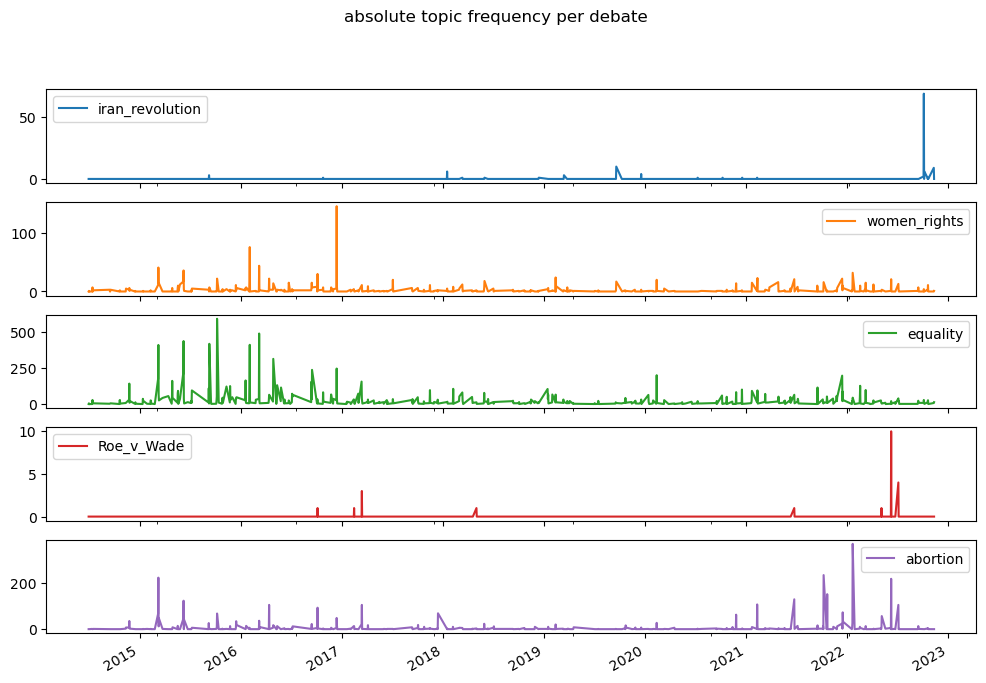

In [30]:
df_summed_1 = df_summed
df_summed_1 = df_summed_1.drop(['gender_pay_gap', 'care_work', 'women','men'], axis=1)

df_summed_1 = df_summed_1[['iran_revolution', 'women_rights', 'equality', 'Roe_v_Wade', 'abortion']]

df_summed_1.plot(subplots=True, kind='line', figsize=(12,8), title= 'absolute topic frequency per debate',xlabel='')
#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/subplots_1a.png')

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)

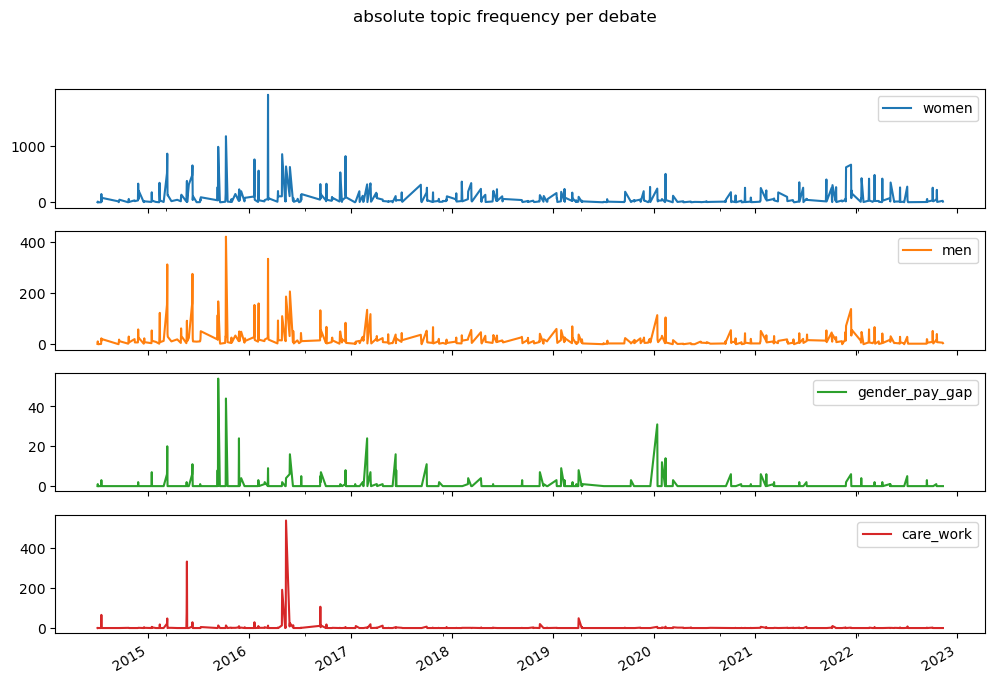

In [31]:
df_summed_2 = df_summed
df_summed_2 = df_summed_2.drop(['iran_revolution', 'women_rights', 'equality', 'Roe_v_Wade', 'abortion'], axis=1)

df_summed_2 = df_summed_2[['women','men','gender_pay_gap', 'care_work' ]]

df_summed_2.plot(subplots=True, kind='line', figsize=(12,8), title= 'absolute topic frequency per debate',xlabel='')
#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/subplots_2a.png')

In [32]:
# summing by month
df_summed_month = df_orig_w_counts
df_summed_month = df_summed_month.assign(mmYYYY = df_summed_month.date)
df_summed_month['mmYYYY'] = df_summed_month.mmYYYY.dt.strftime('%m%Y')
df_summed_month['mmYYYY'] = pd.to_datetime(df_summed_month['mmYYYY'], format='%m%Y')
df_summed_month.head()

,int_id,debate_id,date,speaker,is_mep,text,speaker_id,role,party,text_translated,...,women,gender_pay_gap,equality,care_work,abortion,women_rights,men,people,Roe_v_Wade,mmYYYY
0,2-008-000,20140701.EN,2014-07-01,Presidente,True,Ringrazio il maestro e tutta l'orchestra. Ric...,4436,NaN,NaN,I thank the master and the whole orchestra.I r...,...,0,0,0,0,0,0,0,2976,0,2014-07-01
2,2-010-000,20140701.EN,2014-07-01,Sajjad Karim,True,"Mr President, I rise to speak with a sense of...",28481,NaN,NaN,"Mr President, I rise to speak with a sense of ...",...,0,0,0,0,0,0,0,4467,0,2014-07-01
3,2-011-000,20140701.EN,2014-07-01,Ulrike Lunacek,True,"Mr President, firstly let me welcome all the ...",97017,NaN,NaN,"Mr President, firstly let me welcome all the n...",...,1,0,0,0,0,0,0,4050,0,2014-07-01
4,2-013-000,20140701.EN,2014-07-01,Martin Schulz,True,"Herr Präsident, meine sehr geehrten Damen und...",1911,NaN,NaN,"Mr. President, my dear ladies and gentlemen, d...",...,1,0,0,0,0,0,1,3479,0,2014-07-01
5,2-014-000,20140701.EN,2014-07-01,Beatrix von Storch,True,Herr Präsident! Mein Name ist Beatrix von Sto...,124825,NaN,NaN,Mister President!My name is Beatrix von Storch...,...,0,0,0,0,0,0,0,547,0,2014-07-01


In [33]:
df_summed_mY = df_summed_month # backup

In [34]:
df_summed_month = df_summed_month.groupby(by="mmYYYY").sum()
df_summed_month = df_summed_month.drop('is_mep', axis=1)
df_summed_month = df_summed_month.drop('party', axis=1)
df_summed_month = df_summed_month.drop('birth_year', axis=1)
df_summed_month = df_summed_month.drop('people', axis=1) #too many
df_summed_month = df_summed_month.drop('men', axis=1) #too many
df_summed_month


C:\Users\Katharina\AppData\Local\Temp\ipykernel_11876\3317620330.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_summed_month = df_summed_month.groupby(by="mmYYYY").sum()


,iran_revolution,women,gender_pay_gap,equality,care_work,abortion,women_rights,Roe_v_Wade
mmYYYY,,,,,,,,
2014-07-01,0,251,4,43,67,2,10,0
2014-09-01,0,90,0,14,0,0,6,0
2014-10-01,0,81,0,56,3,0,3,0
2014-11-01,0,675,2,216,3,56,18,0
2014-12-01,0,57,0,23,6,0,1,0
...,...,...,...,...,...,...,...,...
2022-06-01,0,307,0,41,3,222,23,10
2022-07-01,0,335,5,76,10,106,14,4
2022-09-01,0,124,3,47,2,15,9,0


In [35]:
#converting all values to ints
df_summed_month = df_summed_month.astype({'women':'int','gender_pay_gap':'int', 
                                         'equality':'int','care_work':'int', 'abortion':'int', 'women_rights':'int',
                                         'Roe_v_Wade':'int'})


In [36]:
df_summed_month

,iran_revolution,women,gender_pay_gap,equality,care_work,abortion,women_rights,Roe_v_Wade
mmYYYY,,,,,,,,
2014-07-01,0,251,4,43,67,2,10,0
2014-09-01,0,90,0,14,0,0,6,0
2014-10-01,0,81,0,56,3,0,3,0
2014-11-01,0,675,2,216,3,56,18,0
2014-12-01,0,57,0,23,6,0,1,0
...,...,...,...,...,...,...,...,...
2022-06-01,0,307,0,41,3,222,23,10
2022-07-01,0,335,5,76,10,106,14,4
2022-09-01,0,124,3,47,2,15,9,0


Text(0.5, 0, 'year')

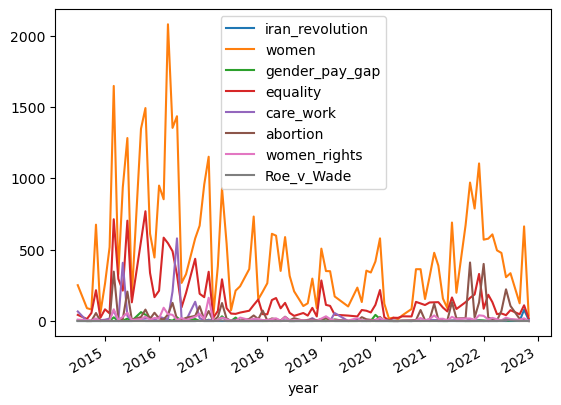

In [37]:
df_summed_month.plot(kind='line').set_xlabel("year")
#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/all_by_m-y2.png')

In [38]:
df_summed_month

,iran_revolution,women,gender_pay_gap,equality,care_work,abortion,women_rights,Roe_v_Wade
mmYYYY,,,,,,,,
2014-07-01,0,251,4,43,67,2,10,0
2014-09-01,0,90,0,14,0,0,6,0
2014-10-01,0,81,0,56,3,0,3,0
2014-11-01,0,675,2,216,3,56,18,0
2014-12-01,0,57,0,23,6,0,1,0
...,...,...,...,...,...,...,...,...
2022-06-01,0,307,0,41,3,222,23,10
2022-07-01,0,335,5,76,10,106,14,4
2022-09-01,0,124,3,47,2,15,9,0


array([<AxesSubplot: xlabel='mmYYYY'>, <AxesSubplot: xlabel='mmYYYY'>,
       <AxesSubplot: xlabel='mmYYYY'>, <AxesSubplot: xlabel='mmYYYY'>,
       <AxesSubplot: xlabel='mmYYYY'>, <AxesSubplot: xlabel='mmYYYY'>,
       <AxesSubplot: xlabel='mmYYYY'>, <AxesSubplot: xlabel='mmYYYY'>],
      dtype=object)

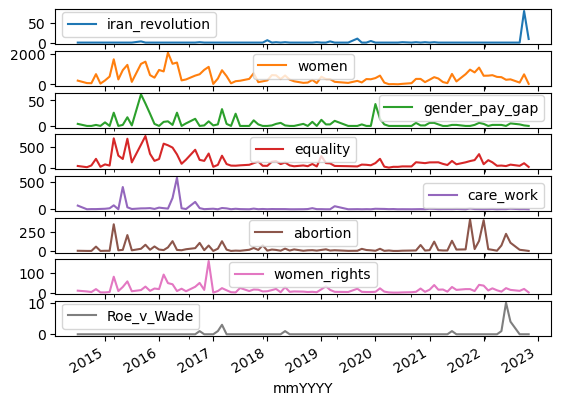

In [39]:
df_summed_month.plot(subplots=True, kind='line')
#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/sep_by_m-y2.png')

In [40]:
df_summed_gender_year = df_summed_mY
df_summed_gender_year = df_summed_gender_year.assign(YYYY = df_summed_gender_year.mmYYYY)
df_summed_gender_year['YYYY'] = df_summed_gender_year.YYYY.dt.strftime('%Y')
#df_summed_gender_year['YYYY'] = pd.to_datetime(df_summed_gender_year['YYYY'], format='%Y')
df_summed_gender_year.head()

,int_id,debate_id,date,speaker,is_mep,text,speaker_id,role,party,text_translated,...,gender_pay_gap,equality,care_work,abortion,women_rights,men,people,Roe_v_Wade,mmYYYY,YYYY
0,2-008-000,20140701.EN,2014-07-01,Presidente,True,Ringrazio il maestro e tutta l'orchestra. Ric...,4436,NaN,NaN,I thank the master and the whole orchestra.I r...,...,0,0,0,0,0,0,2976,0,2014-07-01,2014
2,2-010-000,20140701.EN,2014-07-01,Sajjad Karim,True,"Mr President, I rise to speak with a sense of...",28481,NaN,NaN,"Mr President, I rise to speak with a sense of ...",...,0,0,0,0,0,0,4467,0,2014-07-01,2014
3,2-011-000,20140701.EN,2014-07-01,Ulrike Lunacek,True,"Mr President, firstly let me welcome all the ...",97017,NaN,NaN,"Mr President, firstly let me welcome all the n...",...,0,0,0,0,0,0,4050,0,2014-07-01,2014
4,2-013-000,20140701.EN,2014-07-01,Martin Schulz,True,"Herr Präsident, meine sehr geehrten Damen und...",1911,NaN,NaN,"Mr. President, my dear ladies and gentlemen, d...",...,0,0,0,0,0,1,3479,0,2014-07-01,2014
5,2-014-000,20140701.EN,2014-07-01,Beatrix von Storch,True,Herr Präsident! Mein Name ist Beatrix von Sto...,124825,NaN,NaN,Mister President!My name is Beatrix von Storch...,...,0,0,0,0,0,0,547,0,2014-07-01,2014


### by AGE

In [41]:
df_summed_gender_age = df_summed_gender_year

In [42]:
df_summed_gender_age.dtypes

int_id                              object
debate_id                           object
date                        datetime64[ns]
speaker                             object
is_mep                                bool
text                                object
speaker_id                          object
role                                object
party                              float64
text_translated                     object
language                            object
full Name                           object
country                             object
EU political group                  object
national political group            object
nationalty                          object
gender                              object
birth_year                           int64
birth_place                         object
political_groups                    object
national_parties                    object
iran_revolution                      int64
women                                int64
gender_pay_

In [43]:
# TOO MANY COLUMNS!
df_summed_gender_age = df_summed_gender_age.drop(columns=['mmYYYY'])
df_summed_gender_age = df_summed_gender_age.assign(debate_year=df_summed_gender_age.YYYY.astype(int))
#df_summed_gender_age['debate_year'] = df_summed_gender_age.debate_year.astype(int)

In [44]:
#df_summed_gender_age.debate_year.unique()
#list(df_summed_gender_age.columns.values)
#df_summed_gender_age.birth_year.unique()

In [45]:
#df_summed_gender_year
df_summed_gender_age = df_summed_gender_age.drop(columns=['YYYY'])
df_summed_gender_age = df_summed_gender_age[df_summed_gender_age.birth_year != 0] #removing all rows (7940) with birth year = 0
df_summed_gender_age = df_summed_gender_age.assign(age_atDebate = df_summed_gender_age.debate_year - df_summed_gender_age.birth_year)
df_summed_gender_age.head()

,int_id,debate_id,date,speaker,is_mep,text,speaker_id,role,party,text_translated,...,gender_pay_gap,equality,care_work,abortion,women_rights,men,people,Roe_v_Wade,debate_year,age_atDebate
0,2-008-000,20140701.EN,2014-07-01,Presidente,True,Ringrazio il maestro e tutta l'orchestra. Ric...,4436,NaN,NaN,I thank the master and the whole orchestra.I r...,...,0,0,0,0,0,0,2976,0,2014,56
2,2-010-000,20140701.EN,2014-07-01,Sajjad Karim,True,"Mr President, I rise to speak with a sense of...",28481,NaN,NaN,"Mr President, I rise to speak with a sense of ...",...,0,0,0,0,0,0,4467,0,2014,44
3,2-011-000,20140701.EN,2014-07-01,Ulrike Lunacek,True,"Mr President, firstly let me welcome all the ...",97017,NaN,NaN,"Mr President, firstly let me welcome all the n...",...,0,0,0,0,0,0,4050,0,2014,57
4,2-013-000,20140701.EN,2014-07-01,Martin Schulz,True,"Herr Präsident, meine sehr geehrten Damen und...",1911,NaN,NaN,"Mr. President, my dear ladies and gentlemen, d...",...,0,0,0,0,0,1,3479,0,2014,59
5,2-014-000,20140701.EN,2014-07-01,Beatrix von Storch,True,Herr Präsident! Mein Name ist Beatrix von Sto...,124825,NaN,NaN,Mister President!My name is Beatrix von Storch...,...,0,0,0,0,0,0,547,0,2014,43


In [46]:
df_summed_age_grouped_1 = df_summed_gender_age.drop('birth_year', axis=1)
df_summed_age_grouped_1 = df_summed_age_grouped_1.drop('language', axis=1)
df_summed_age_grouped_1 = df_summed_age_grouped_1.drop('nationalty', axis=1)
df_summed_age_grouped_1 = df_summed_age_grouped_1.drop('people', axis=1)
df_summed_age_grouped_1 = df_summed_age_grouped_1.drop('debate_year', axis=1)

In [47]:
df_summed_age_grouped_1

,int_id,debate_id,date,speaker,is_mep,text,speaker_id,role,party,text_translated,...,iran_revolution,women,gender_pay_gap,equality,care_work,abortion,women_rights,men,Roe_v_Wade,age_atDebate
0,2-008-000,20140701.EN,2014-07-01,Presidente,True,Ringrazio il maestro e tutta l'orchestra. Ric...,4436,NaN,NaN,I thank the master and the whole orchestra.I r...,...,0,0,0,0,0,0,0,0,0,56
2,2-010-000,20140701.EN,2014-07-01,Sajjad Karim,True,"Mr President, I rise to speak with a sense of...",28481,NaN,NaN,"Mr President, I rise to speak with a sense of ...",...,0,0,0,0,0,0,0,0,0,44
3,2-011-000,20140701.EN,2014-07-01,Ulrike Lunacek,True,"Mr President, firstly let me welcome all the ...",97017,NaN,NaN,"Mr President, firstly let me welcome all the n...",...,0,1,0,0,0,0,0,0,0,57
4,2-013-000,20140701.EN,2014-07-01,Martin Schulz,True,"Herr Präsident, meine sehr geehrten Damen und...",1911,NaN,NaN,"Mr. President, my dear ladies and gentlemen, d...",...,0,1,0,0,0,0,0,1,0,59
5,2-014-000,20140701.EN,2014-07-01,Beatrix von Storch,True,Herr Präsident! Mein Name ist Beatrix von Sto...,124825,NaN,NaN,Mister President!My name is Beatrix von Storch...,...,0,0,0,0,0,0,0,0,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275090,3-367-0000,20220216.EN,2022-02-16,Vera Tax,True,"Voorzitter, het huidige tolsysteem in de EU i...",197756,NaN,NaN,"Chairman, the current toll system in the EU is...",...,0,0,0,0,0,0,0,0,0,50
275091,3-368-0000,20220216.EN,2022-02-16,Ciarán Cuffe,True,"A Uachtarán, I dtús báire, bhí an togra Eurov...",197654,NaN,NaN,"His president, initially, was the Eurovignette...",...,0,0,0,0,0,0,0,0,0,59
275092,3-369-0000,20220216.EN,2022-02-16,Sēdes vadītājs,True,"Liels paldies! Un tiešām gandarījums, ka Eiro...",28615,NaN,NaN,"Thank you very much!And indeed, the European U...",...,0,0,0,0,0,0,0,0,0,64
275094,3-371-0000,20220216.EN,2022-02-16,Sēdes vadītājs,True,"Debates ir beigušās par šo tematu, un es grib...",28615,NaN,NaN,"The debate has ended on this topic, and I want...",...,0,0,0,0,0,0,0,0,0,64


C:\Users\Katharina\AppData\Local\Temp\ipykernel_11876\578671422.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_summed_age_grouped_2 = df_summed_age_grouped_2.groupby(["age_atDebate", "gender"]).sum()


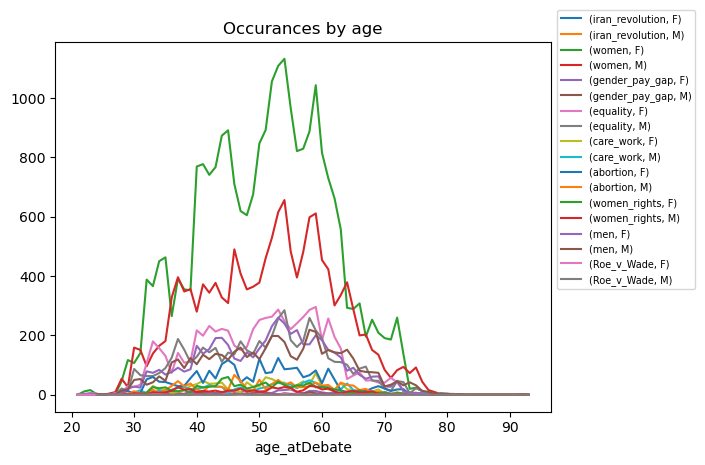

In [48]:
df_summed_age_grouped_2 = df_summed_age_grouped_1.drop('is_mep', axis=1)
df_summed_age_grouped_2 = df_summed_age_grouped_2.drop('party', axis=1)
df_summed_age_grouped_2 = df_summed_age_grouped_2.groupby(["age_atDebate", "gender"]).sum()
df_summed_age_grouped_2 = df_summed_age_grouped_2.unstack()
df_summed_age_grouped_2.plot(kind='line', title='Occurances by age').legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), prop={'size': 7})
#legend(loc='right')

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/speaker_age2.png')

In [49]:
df_summed_gender_age

,int_id,debate_id,date,speaker,is_mep,text,speaker_id,role,party,text_translated,...,gender_pay_gap,equality,care_work,abortion,women_rights,men,people,Roe_v_Wade,debate_year,age_atDebate
0,2-008-000,20140701.EN,2014-07-01,Presidente,True,Ringrazio il maestro e tutta l'orchestra. Ric...,4436,NaN,NaN,I thank the master and the whole orchestra.I r...,...,0,0,0,0,0,0,2976,0,2014,56
2,2-010-000,20140701.EN,2014-07-01,Sajjad Karim,True,"Mr President, I rise to speak with a sense of...",28481,NaN,NaN,"Mr President, I rise to speak with a sense of ...",...,0,0,0,0,0,0,4467,0,2014,44
3,2-011-000,20140701.EN,2014-07-01,Ulrike Lunacek,True,"Mr President, firstly let me welcome all the ...",97017,NaN,NaN,"Mr President, firstly let me welcome all the n...",...,0,0,0,0,0,0,4050,0,2014,57
4,2-013-000,20140701.EN,2014-07-01,Martin Schulz,True,"Herr Präsident, meine sehr geehrten Damen und...",1911,NaN,NaN,"Mr. President, my dear ladies and gentlemen, d...",...,0,0,0,0,0,1,3479,0,2014,59
5,2-014-000,20140701.EN,2014-07-01,Beatrix von Storch,True,Herr Präsident! Mein Name ist Beatrix von Sto...,124825,NaN,NaN,Mister President!My name is Beatrix von Storch...,...,0,0,0,0,0,0,547,0,2014,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275090,3-367-0000,20220216.EN,2022-02-16,Vera Tax,True,"Voorzitter, het huidige tolsysteem in de EU i...",197756,NaN,NaN,"Chairman, the current toll system in the EU is...",...,0,0,0,0,0,0,643,0,2022,50
275091,3-368-0000,20220216.EN,2022-02-16,Ciarán Cuffe,True,"A Uachtarán, I dtús báire, bhí an togra Eurov...",197654,NaN,NaN,"His president, initially, was the Eurovignette...",...,0,0,0,0,0,0,680,0,2022,59
275092,3-369-0000,20220216.EN,2022-02-16,Sēdes vadītājs,True,"Liels paldies! Un tiešām gandarījums, ka Eiro...",28615,NaN,NaN,"Thank you very much!And indeed, the European U...",...,0,0,0,0,0,0,246,0,2022,64
275094,3-371-0000,20220216.EN,2022-02-16,Sēdes vadītājs,True,"Debates ir beigušās par šo tematu, un es grib...",28615,NaN,NaN,"The debate has ended on this topic, and I want...",...,0,0,0,0,0,0,212,0,2022,64


# binary relation - heatmap

In [50]:
df_summed_gender_age.tail()

,int_id,debate_id,date,speaker,is_mep,text,speaker_id,role,party,text_translated,...,gender_pay_gap,equality,care_work,abortion,women_rights,men,people,Roe_v_Wade,debate_year,age_atDebate
275090,3-367-0000,20220216.EN,2022-02-16,Vera Tax,True,"Voorzitter, het huidige tolsysteem in de EU i...",197756,NaN,NaN,"Chairman, the current toll system in the EU is...",...,0,0,0,0,0,0,643,0,2022,50
275091,3-368-0000,20220216.EN,2022-02-16,Ciarán Cuffe,True,"A Uachtarán, I dtús báire, bhí an togra Eurov...",197654,NaN,NaN,"His president, initially, was the Eurovignette...",...,0,0,0,0,0,0,680,0,2022,59
275092,3-369-0000,20220216.EN,2022-02-16,Sēdes vadītājs,True,"Liels paldies! Un tiešām gandarījums, ka Eiro...",28615,NaN,NaN,"Thank you very much!And indeed, the European U...",...,0,0,0,0,0,0,246,0,2022,64
275094,3-371-0000,20220216.EN,2022-02-16,Sēdes vadītājs,True,"Debates ir beigušās par šo tematu, un es grib...",28615,NaN,NaN,"The debate has ended on this topic, and I want...",...,0,0,0,0,0,0,212,0,2022,64
275095,3-380-0000,20220216.EN,2022-02-16,Sēdes vadītājs,True,"Sēde ir noslēgusies, un tā atsāksies rītdien,...",28615,NaN,NaN,"The meeting is over and will resume tomorrow, ...",...,0,0,0,0,0,0,214,0,2022,64


In [51]:
df_heatmap_debates = df_summed_gender_age.groupby(by='debate_id')['iran_revolution', 'women', 'gender_pay_gap', 'equality', 'care_work', 'abortion', 'women_rights', 'men', 'people', 'Roe_v_Wade'].sum()
df_heatmap_debates

C:\Users\Katharina\AppData\Local\Temp\ipykernel_11876\1329437935.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_heatmap_debates = df_summed_gender_age.groupby(by='debate_id')['iran_revolution', 'women', 'gender_pay_gap', 'equality', 'care_work', 'abortion', 'women_rights', 'men', 'people', 'Roe_v_Wade'].sum()


,iran_revolution,women,gender_pay_gap,equality,care_work,abortion,women_rights,men,people,Roe_v_Wade
debate_id,,,,,,,,,,
20140701.EN,0,2,0,0,0,0,0,1,25142,0
20140702.EN,0,13,1,5,1,0,1,11,176849,0
20140703.EN,0,0,0,0,0,0,0,0,68,0
20140714.EN,0,0,0,0,0,1,0,1,33899,0
20140715.EN,0,144,3,28,62,0,7,22,325848,0
...,...,...,...,...,...,...,...,...,...,...
20221018.EN,0,33,0,10,0,1,0,9,421367,0
20221019.EN,1,168,0,23,0,3,11,31,382491,0
20221020.EN,0,6,0,0,0,0,0,8,127084,0


Text(0.5, 1.0, 'heatmap of topics - grouped by debate')

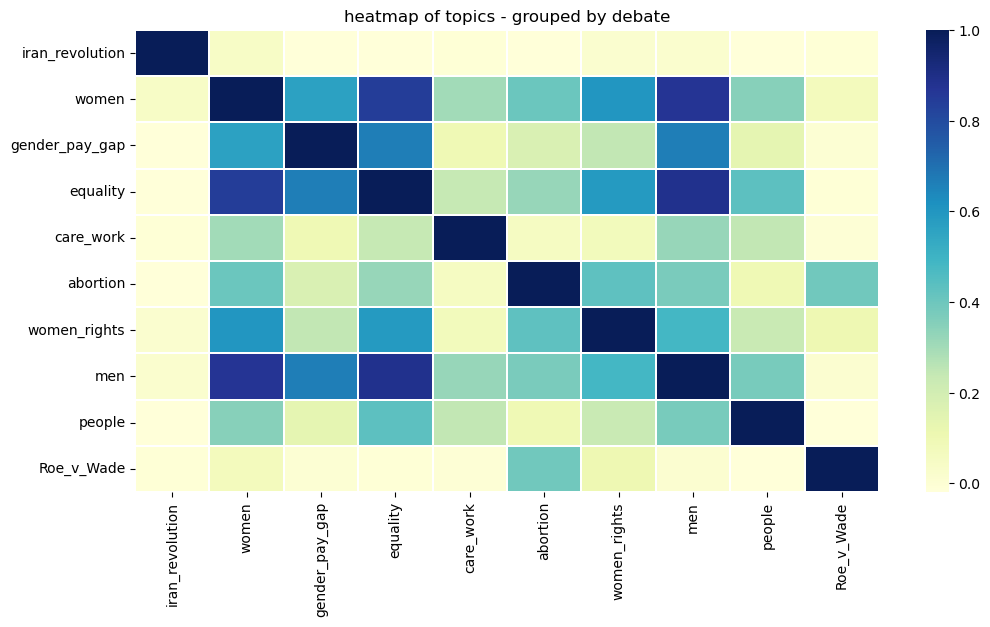

In [52]:
plt.figure(figsize=(12, 6))
corr = df_heatmap_debates.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")
ax.set_title('heatmap of topics - grouped by debate')


#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/heatmap_debate-grouped_wo-factoriz.png', bbox_inches='tight')

In [53]:
df_heatmap_debates_binary = df_heatmap_debates

In [54]:
df_heatmap_debates_binary.loc[df_heatmap_debates_binary['iran_revolution']> 0,'iran_revolution'] = 1
df_heatmap_debates_binary.loc[df_heatmap_debates_binary['women']> 0,'women'] = 1
df_heatmap_debates_binary.loc[df_heatmap_debates_binary['gender_pay_gap']> 0,'gender_pay_gap'] = 1
df_heatmap_debates_binary.loc[df_heatmap_debates_binary['equality']> 0,'equality'] = 1
df_heatmap_debates_binary.loc[df_heatmap_debates_binary['care_work']> 0,'care_work'] = 1
df_heatmap_debates_binary.loc[df_heatmap_debates_binary['abortion']> 0,'abortion'] = 1
df_heatmap_debates_binary.loc[df_heatmap_debates_binary['women_rights']> 0,'women_rights'] = 1
df_heatmap_debates_binary.loc[df_heatmap_debates_binary['men']> 0,'men'] = 1
df_heatmap_debates_binary.loc[df_heatmap_debates_binary['people']> 0,'people'] = 1
df_heatmap_debates_binary.loc[df_heatmap_debates_binary['Roe_v_Wade']> 0,'Roe_v_Wade'] = 1

In [55]:
df_heatmap_debates_binary

,iran_revolution,women,gender_pay_gap,equality,care_work,abortion,women_rights,men,people,Roe_v_Wade
debate_id,,,,,,,,,,
20140701.EN,0,1,0,0,0,0,0,1,1,0
20140702.EN,0,1,1,1,1,0,1,1,1,0
20140703.EN,0,0,0,0,0,0,0,0,1,0
20140714.EN,0,0,0,0,0,1,0,1,1,0
20140715.EN,0,1,1,1,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
20221018.EN,0,1,0,1,0,1,0,1,1,0
20221019.EN,1,1,0,1,0,1,1,1,1,0
20221020.EN,0,1,0,0,0,0,0,1,1,0


In [56]:
corr = df_heatmap_debates_binary.corr()
corr

,iran_revolution,women,gender_pay_gap,equality,care_work,abortion,women_rights,men,people,Roe_v_Wade
iran_revolution,1.000000,0.035514,-0.063202,0.013785,-0.026925,0.001303,0.059696,0.036801,NaN,-0.026668
women,0.035514,1.000000,0.081311,0.530528,0.100490,0.124987,0.183187,0.608827,NaN,0.023414
gender_pay_gap,-0.063202,0.081311,1.000000,0.129635,0.352016,0.190591,0.307341,0.084259,NaN,0.113449
equality,0.013785,0.530528,0.129635,1.000000,0.132769,0.213461,0.242341,0.416145,NaN,0.037329
care_work,-0.026925,0.100490,0.352016,0.132769,1.000000,0.186881,0.228827,0.131700,NaN,0.044396
abortion,0.001303,0.124987,0.190591,0.213461,0.186881,1.000000,0.421697,0.157401,NaN,0.133461
women_rights,0.059696,0.183187,0.307341,0.242341,0.228827,0.421697,1.000000,0.141000,NaN,0.127816
men,0.036801,0.608827,0.084259,0.416145,0.131700,0.157401,0.141000,1.000000,NaN,0.024263
people,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Roe_v_Wade,-0.026668,0.023414,0.113449,0.037329,0.044396,0.133461,0.127816,0.024263,NaN,1.000000


Text(0.5, 1.0, 'heatmap with binary topic groups - grouped by debate')

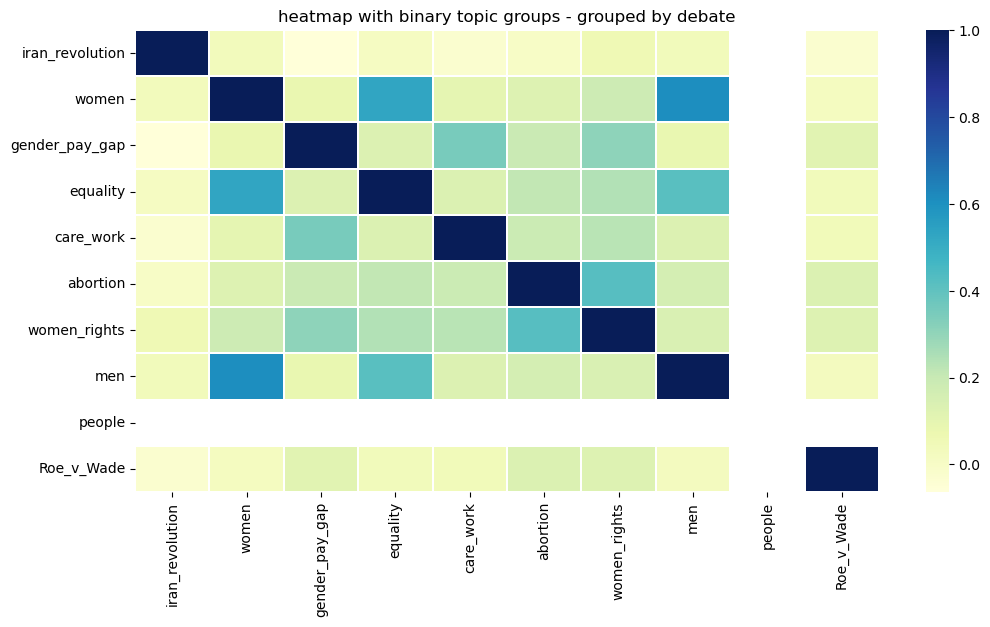

In [57]:
plt.figure(figsize=(12, 6))
corr = df_heatmap_debates_binary.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")
ax.set_title('heatmap with binary topic groups - grouped by debate')

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/heatmap_binary-count_by-debate.png', bbox_inches='tight')

Text(0.5, 1.0, 'heatmap with binary topic groups - grouped by debate (spearman)')

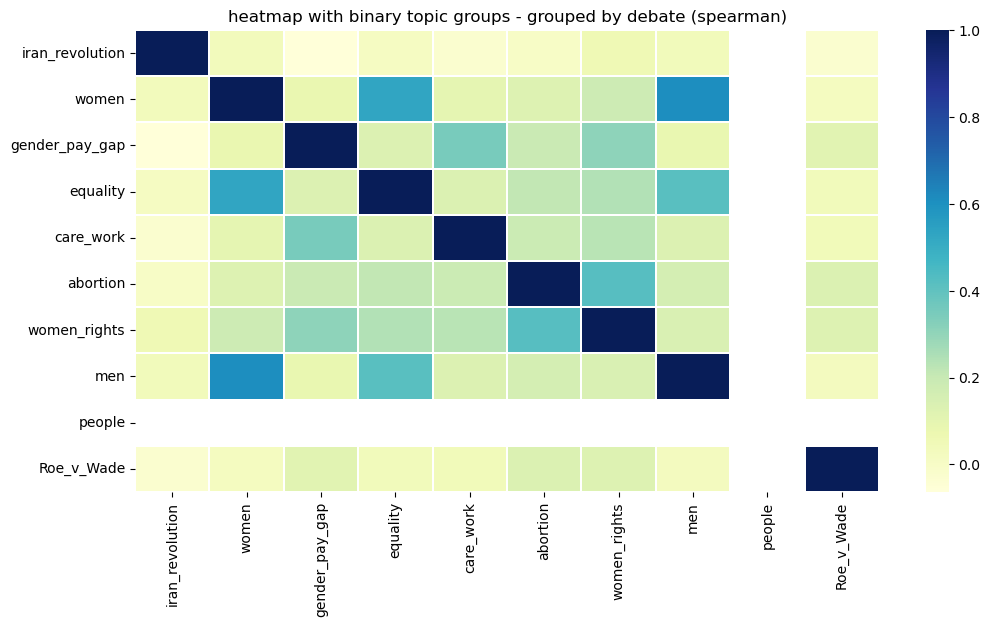

In [58]:
plt.figure(figsize=(12, 6))
corr = df_heatmap_debates_binary.corr(method = 'spearman')
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")
ax.set_title('heatmap with binary topic groups - grouped by debate (spearman)')

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/heatmap_binary-count_by-debate.png')


In [59]:
 # per intervention

In [60]:
df_binary_heatmap = df_summed_gender_age

In [61]:
df_binary_heatmap.loc[df_binary_heatmap['iran_revolution']> 0,'iran_revolution'] = 1
df_binary_heatmap.loc[df_binary_heatmap['women']> 0,'women'] = 1
df_binary_heatmap.loc[df_binary_heatmap['gender_pay_gap']> 0,'gender_pay_gap'] = 1
df_binary_heatmap.loc[df_binary_heatmap['equality']> 0,'equality'] = 1
df_binary_heatmap.loc[df_binary_heatmap['care_work']> 0,'care_work'] = 1
df_binary_heatmap.loc[df_binary_heatmap['abortion']> 0,'abortion'] = 1
df_binary_heatmap.loc[df_binary_heatmap['women_rights']> 0,'women_rights'] = 1
df_binary_heatmap.loc[df_binary_heatmap['men']> 0,'men'] = 1
df_binary_heatmap.loc[df_binary_heatmap['people']> 0,'people'] = 1
df_binary_heatmap.loc[df_binary_heatmap['Roe_v_Wade']> 0,'Roe_v_Wade'] = 1


df_binary_heatmap.tail()

,int_id,debate_id,date,speaker,is_mep,text,speaker_id,role,party,text_translated,...,gender_pay_gap,equality,care_work,abortion,women_rights,men,people,Roe_v_Wade,debate_year,age_atDebate
275090,3-367-0000,20220216.EN,2022-02-16,Vera Tax,True,"Voorzitter, het huidige tolsysteem in de EU i...",197756,NaN,NaN,"Chairman, the current toll system in the EU is...",...,0,0,0,0,0,0,1,0,2022,50
275091,3-368-0000,20220216.EN,2022-02-16,Ciarán Cuffe,True,"A Uachtarán, I dtús báire, bhí an togra Eurov...",197654,NaN,NaN,"His president, initially, was the Eurovignette...",...,0,0,0,0,0,0,1,0,2022,59
275092,3-369-0000,20220216.EN,2022-02-16,Sēdes vadītājs,True,"Liels paldies! Un tiešām gandarījums, ka Eiro...",28615,NaN,NaN,"Thank you very much!And indeed, the European U...",...,0,0,0,0,0,0,1,0,2022,64
275094,3-371-0000,20220216.EN,2022-02-16,Sēdes vadītājs,True,"Debates ir beigušās par šo tematu, un es grib...",28615,NaN,NaN,"The debate has ended on this topic, and I want...",...,0,0,0,0,0,0,1,0,2022,64
275095,3-380-0000,20220216.EN,2022-02-16,Sēdes vadītājs,True,"Sēde ir noslēgusies, un tā atsāksies rītdien,...",28615,NaN,NaN,"The meeting is over and will resume tomorrow, ...",...,0,0,0,0,0,0,1,0,2022,64


### contingency table - relative row/column frequency

In [62]:
df_summed_gender_age.head()

,int_id,debate_id,date,speaker,is_mep,text,speaker_id,role,party,text_translated,...,gender_pay_gap,equality,care_work,abortion,women_rights,men,people,Roe_v_Wade,debate_year,age_atDebate
0,2-008-000,20140701.EN,2014-07-01,Presidente,True,Ringrazio il maestro e tutta l'orchestra. Ric...,4436,NaN,NaN,I thank the master and the whole orchestra.I r...,...,0,0,0,0,0,0,1,0,2014,56
2,2-010-000,20140701.EN,2014-07-01,Sajjad Karim,True,"Mr President, I rise to speak with a sense of...",28481,NaN,NaN,"Mr President, I rise to speak with a sense of ...",...,0,0,0,0,0,0,1,0,2014,44
3,2-011-000,20140701.EN,2014-07-01,Ulrike Lunacek,True,"Mr President, firstly let me welcome all the ...",97017,NaN,NaN,"Mr President, firstly let me welcome all the n...",...,0,0,0,0,0,0,1,0,2014,57
4,2-013-000,20140701.EN,2014-07-01,Martin Schulz,True,"Herr Präsident, meine sehr geehrten Damen und...",1911,NaN,NaN,"Mr. President, my dear ladies and gentlemen, d...",...,0,0,0,0,0,1,1,0,2014,59
5,2-014-000,20140701.EN,2014-07-01,Beatrix von Storch,True,Herr Präsident! Mein Name ist Beatrix von Sto...,124825,NaN,NaN,Mister President!My name is Beatrix von Storch...,...,0,0,0,0,0,0,1,0,2014,43


In [63]:
df_frequency = df_summed_gender_age
df_frequency.head()

,int_id,debate_id,date,speaker,is_mep,text,speaker_id,role,party,text_translated,...,gender_pay_gap,equality,care_work,abortion,women_rights,men,people,Roe_v_Wade,debate_year,age_atDebate
0,2-008-000,20140701.EN,2014-07-01,Presidente,True,Ringrazio il maestro e tutta l'orchestra. Ric...,4436,NaN,NaN,I thank the master and the whole orchestra.I r...,...,0,0,0,0,0,0,1,0,2014,56
2,2-010-000,20140701.EN,2014-07-01,Sajjad Karim,True,"Mr President, I rise to speak with a sense of...",28481,NaN,NaN,"Mr President, I rise to speak with a sense of ...",...,0,0,0,0,0,0,1,0,2014,44
3,2-011-000,20140701.EN,2014-07-01,Ulrike Lunacek,True,"Mr President, firstly let me welcome all the ...",97017,NaN,NaN,"Mr President, firstly let me welcome all the n...",...,0,0,0,0,0,0,1,0,2014,57
4,2-013-000,20140701.EN,2014-07-01,Martin Schulz,True,"Herr Präsident, meine sehr geehrten Damen und...",1911,NaN,NaN,"Mr. President, my dear ladies and gentlemen, d...",...,0,0,0,0,0,1,1,0,2014,59
5,2-014-000,20140701.EN,2014-07-01,Beatrix von Storch,True,Herr Präsident! Mein Name ist Beatrix von Sto...,124825,NaN,NaN,Mister President!My name is Beatrix von Storch...,...,0,0,0,0,0,0,1,0,2014,43


In [64]:
df_frequency = df_frequency.drop('text_translated', axis=1)
df_frequency = df_frequency.drop('language', axis=1)
df_frequency = df_frequency.drop('country', axis=1)
df_frequency = df_frequency.drop('EU political group', axis=1)
df_frequency = df_frequency.drop('nationalty', axis=1)
df_frequency = df_frequency.drop('gender', axis=1)
df_frequency = df_frequency.drop('birth_year', axis=1)
df_frequency = df_frequency.drop('debate_year', axis=1)
df_frequency = df_frequency.drop('age_atDebate', axis=1)
df_frequency.head()

,int_id,debate_id,date,speaker,is_mep,text,speaker_id,role,party,full Name,...,iran_revolution,women,gender_pay_gap,equality,care_work,abortion,women_rights,men,people,Roe_v_Wade
0,2-008-000,20140701.EN,2014-07-01,Presidente,True,Ringrazio il maestro e tutta l'orchestra. Ric...,4436,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,2-010-000,20140701.EN,2014-07-01,Sajjad Karim,True,"Mr President, I rise to speak with a sense of...",28481,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,2-011-000,20140701.EN,2014-07-01,Ulrike Lunacek,True,"Mr President, firstly let me welcome all the ...",97017,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,1,0
4,2-013-000,20140701.EN,2014-07-01,Martin Schulz,True,"Herr Präsident, meine sehr geehrten Damen und...",1911,NaN,NaN,NaN,...,0,1,0,0,0,0,0,1,1,0
5,2-014-000,20140701.EN,2014-07-01,Beatrix von Storch,True,Herr Präsident! Mein Name ist Beatrix von Sto...,124825,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


### relative topic frequency -  normalized by number of interventions

In [65]:
df_relative_topic = df 

In [66]:
#counting number of interventions per debate_id
df_relative_topic['count'] = df_relative_topic.groupby('debate_id')['debate_id'].transform('count')
df_relative_topic

,int_id,debate_id,date,speaker,is_mep,text,speaker_id,role,party,text_translated,...,women,gender_pay_gap,equality,care_work,abortion,women_rights,men,people,Roe_v_Wade,count
0,2-008-000,20140701.EN,2014-07-01,Presidente,True,Ringrazio il maestro e tutta l'orchestra. Ric...,4436,NaN,NaN,I thank the master and the whole orchestra.I r...,...,0,0,0,0,0,0,0,2976,0,22
2,2-010-000,20140701.EN,2014-07-01,Sajjad Karim,True,"Mr President, I rise to speak with a sense of...",28481,NaN,NaN,"Mr President, I rise to speak with a sense of ...",...,0,0,0,0,0,0,0,4467,0,22
3,2-011-000,20140701.EN,2014-07-01,Ulrike Lunacek,True,"Mr President, firstly let me welcome all the ...",97017,NaN,NaN,"Mr President, firstly let me welcome all the n...",...,1,0,0,0,0,0,0,4050,0,22
4,2-013-000,20140701.EN,2014-07-01,Martin Schulz,True,"Herr Präsident, meine sehr geehrten Damen und...",1911,NaN,NaN,"Mr. President, my dear ladies and gentlemen, d...",...,1,0,0,0,0,0,1,3479,0,22
5,2-014-000,20140701.EN,2014-07-01,Beatrix von Storch,True,Herr Präsident! Mein Name ist Beatrix von Sto...,124825,NaN,NaN,Mister President!My name is Beatrix von Storch...,...,0,0,0,0,0,0,0,547,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275091,3-368-0000,20220216.EN,2022-02-16,Ciarán Cuffe,True,"A Uachtarán, I dtús báire, bhí an togra Eurov...",197654,NaN,NaN,"His president, initially, was the Eurovignette...",...,0,0,0,0,0,0,0,680,0,672
275092,3-369-0000,20220216.EN,2022-02-16,Sēdes vadītājs,True,"Liels paldies! Un tiešām gandarījums, ka Eiro...",28615,NaN,NaN,"Thank you very much!And indeed, the European U...",...,0,0,0,0,0,0,0,246,0,672
275093,3-370-0000,20220216.EN,2022-02-16,Helena Dalli,True,"Mr President, it’s good to hear that many of ...",photo_generic,Member of the Commission,NaN,"Mr President, it’s good to hear that many of y...",...,0,0,0,0,0,0,0,2563,0,672
275094,3-371-0000,20220216.EN,2022-02-16,Sēdes vadītājs,True,"Debates ir beigušās par šo tematu, un es grib...",28615,NaN,NaN,"The debate has ended on this topic, and I want...",...,0,0,0,0,0,0,0,212,0,672


In [67]:
#df_relative_topic.nunique()

In [68]:
#dropping columns that are not relevant
df_relative_topic_reduced = df_relative_topic.drop(['speaker', 'is_mep', 'text','speaker_id', 'role', 
                                'party', 'text_translated', 'language', 'full Name', 
                                'country', 'EU political group', 'national political group', 
                               'nationalty', 'gender', 'birth_year', 'birth_place', 'political_groups',
                               'national_parties'], axis=1)
df_relative_topic_reduced

,int_id,debate_id,date,iran_revolution,women,gender_pay_gap,equality,care_work,abortion,women_rights,men,people,Roe_v_Wade,count
0,2-008-000,20140701.EN,2014-07-01,0,0,0,0,0,0,0,0,2976,0,22
2,2-010-000,20140701.EN,2014-07-01,0,0,0,0,0,0,0,0,4467,0,22
3,2-011-000,20140701.EN,2014-07-01,0,1,0,0,0,0,0,0,4050,0,22
4,2-013-000,20140701.EN,2014-07-01,0,1,0,0,0,0,0,1,3479,0,22
5,2-014-000,20140701.EN,2014-07-01,0,0,0,0,0,0,0,0,547,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275091,3-368-0000,20220216.EN,2022-02-16,0,0,0,0,0,0,0,0,680,0,672
275092,3-369-0000,20220216.EN,2022-02-16,0,0,0,0,0,0,0,0,246,0,672
275093,3-370-0000,20220216.EN,2022-02-16,0,0,0,0,0,0,0,0,2563,0,672
275094,3-371-0000,20220216.EN,2022-02-16,0,0,0,0,0,0,0,0,212,0,672


In [69]:
# summing frequencies of topics per debate, keeping number of intervention per debate column 'count'
df_relative_topic_reduced_summed = df_relative_topic_reduced.groupby( by="date").agg({'iran_revolution': np.sum, 
                                                             'women': np.sum, 
                                                             'gender_pay_gap': np.sum, 
                                                             'equality': np.sum, 
                                                             'care_work': np.sum, 
                                                             'abortion': np.sum, 
                                                             'women_rights': np.sum, 
                                                             'men': np.sum, 
                                                             'people': np.sum,
                                                             'Roe_v_Wade': np.sum,
                                                              'count': 'first'})
df_relative_topic_reduced_summed

,iran_revolution,women,gender_pay_gap,equality,care_work,abortion,women_rights,men,people,Roe_v_Wade,count
date,,,,,,,,,,,
2014-07-01,0,2,0,0,0,0,0,1,25142,0,22
2014-07-02,0,13,1,5,1,0,1,11,195283,0,150
2014-07-03,0,0,0,0,0,0,0,0,68,0,1
2014-07-14,0,0,0,0,0,1,0,1,33899,0,43
2014-07-15,0,146,3,28,66,0,7,23,338721,0,311
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-18,0,41,0,20,0,1,1,12,562019,0,470
2022-10-19,1,220,0,26,0,4,11,40,465467,0,381
2022-10-20,0,6,0,0,0,0,0,8,140000,0,109


In [70]:
# calculating relative share of frequencies by number of interventions
df_relative_topic_reduced_summed['iran_revolution'] = df_relative_topic_reduced_summed['iran_revolution']/df_relative_topic_reduced_summed['count']
df_relative_topic_reduced_summed['women'] = df_relative_topic_reduced_summed['women']/df_relative_topic_reduced_summed['count']
df_relative_topic_reduced_summed['gender_pay_gap'] = df_relative_topic_reduced_summed['gender_pay_gap']/df_relative_topic_reduced_summed['count']
df_relative_topic_reduced_summed['equality'] = df_relative_topic_reduced_summed['equality']/df_relative_topic_reduced_summed['count']
df_relative_topic_reduced_summed['care_work'] = df_relative_topic_reduced_summed['care_work']/df_relative_topic_reduced_summed['count']
df_relative_topic_reduced_summed['abortion'] = df_relative_topic_reduced_summed['abortion']/df_relative_topic_reduced_summed['count']
df_relative_topic_reduced_summed['women_rights'] = df_relative_topic_reduced_summed['women_rights']/df_relative_topic_reduced_summed['count']
df_relative_topic_reduced_summed['men'] = df_relative_topic_reduced_summed['men']/df_relative_topic_reduced_summed['count']
df_relative_topic_reduced_summed['people'] = df_relative_topic_reduced_summed['people']/df_relative_topic_reduced_summed['count']
df_relative_topic_reduced_summed['Roe_v_Wade'] = df_relative_topic_reduced_summed['Roe_v_Wade']/df_relative_topic_reduced_summed['count']
df_relative_topic_reduced_summed


,iran_revolution,women,gender_pay_gap,equality,care_work,abortion,women_rights,men,people,Roe_v_Wade,count
date,,,,,,,,,,,
2014-07-01,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,1142.818182,0.0,22
2014-07-02,0.000000,0.086667,0.006667,0.033333,0.006667,0.000000,0.006667,0.073333,1301.886667,0.0,150
2014-07-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,0.0,1
2014-07-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,0.023256,788.348837,0.0,43
2014-07-15,0.000000,0.469453,0.009646,0.090032,0.212219,0.000000,0.022508,0.073955,1089.135048,0.0,311
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-18,0.000000,0.087234,0.000000,0.042553,0.000000,0.002128,0.002128,0.025532,1195.785106,0.0,470
2022-10-19,0.002625,0.577428,0.000000,0.068241,0.000000,0.010499,0.028871,0.104987,1221.698163,0.0,381
2022-10-20,0.000000,0.055046,0.000000,0.000000,0.000000,0.000000,0.000000,0.073394,1284.403670,0.0,109


In [71]:
df_relative_plot = df_relative_topic_reduced_summed
df_relative_plot = df_relative_plot.drop(['count'], axis=1)
df_relative_plot

,iran_revolution,women,gender_pay_gap,equality,care_work,abortion,women_rights,men,people,Roe_v_Wade
date,,,,,,,,,,
2014-07-01,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,1142.818182,0.0
2014-07-02,0.000000,0.086667,0.006667,0.033333,0.006667,0.000000,0.006667,0.073333,1301.886667,0.0
2014-07-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,0.0
2014-07-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,0.023256,788.348837,0.0
2014-07-15,0.000000,0.469453,0.009646,0.090032,0.212219,0.000000,0.022508,0.073955,1089.135048,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-10-18,0.000000,0.087234,0.000000,0.042553,0.000000,0.002128,0.002128,0.025532,1195.785106,0.0
2022-10-19,0.002625,0.577428,0.000000,0.068241,0.000000,0.010499,0.028871,0.104987,1221.698163,0.0
2022-10-20,0.000000,0.055046,0.000000,0.000000,0.000000,0.000000,0.000000,0.073394,1284.403670,0.0


array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >], dtype=object)

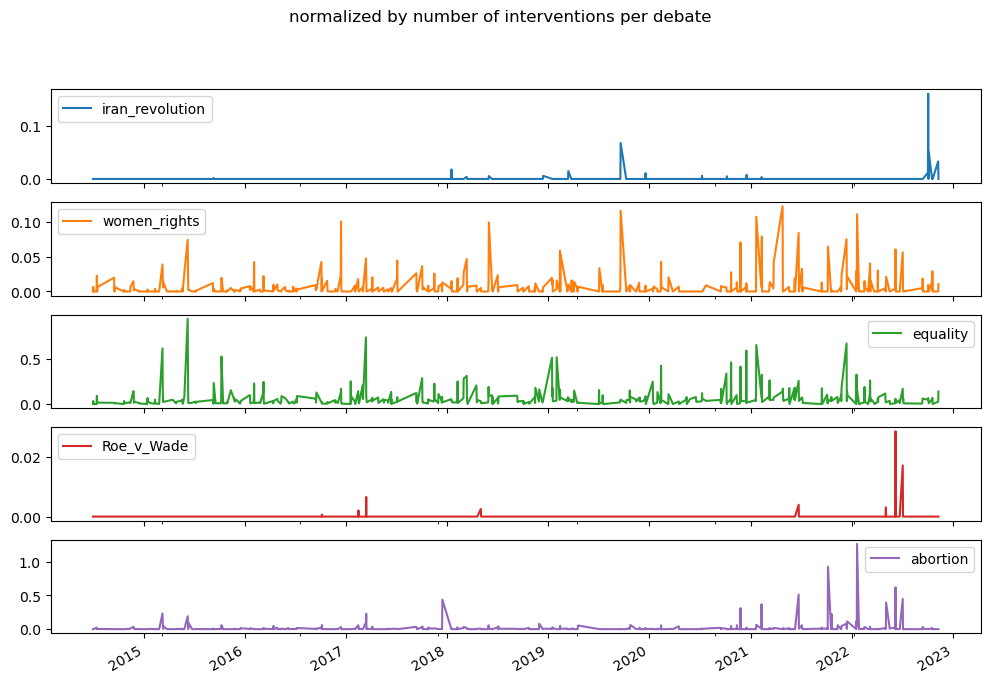

In [72]:
df_relative_plot_1 = df_relative_plot[['iran_revolution', 'women_rights', 'equality', 'Roe_v_Wade', 'abortion']]
df_relative_plot_1.plot(subplots=True, kind='line', figsize=(12,8), title='normalized by number of interventions per debate',xlabel='')

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/subplots_1_normalized.png')

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)

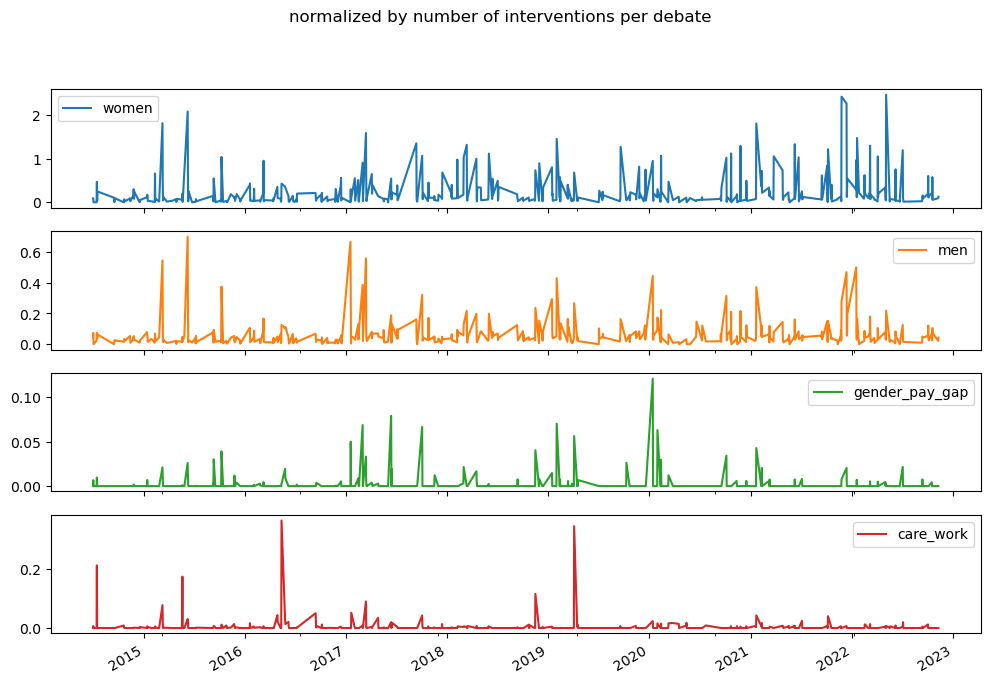

In [73]:
df_relative_plot_2 = df_relative_plot[['women','men','gender_pay_gap', 'care_work']]
df_relative_plot_2.plot(subplots=True, kind='line', figsize=(12,8), title='normalized by number of interventions per debate',xlabel='')

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/subplots_2_normalized.png')

# abortion (also: roe v wade, women rights)

In [74]:
df_summed

,iran_revolution,women,gender_pay_gap,equality,care_work,abortion,women_rights,men,Roe_v_Wade
date,,,,,,,,,
2014-07-01,0,2,0,0,0,0,0,1,0
2014-07-02,0,13,1,5,1,0,1,11,0
2014-07-03,0,0,0,0,0,0,0,0,0
2014-07-14,0,0,0,0,0,1,0,1,0
2014-07-15,0,146,3,28,66,0,7,23,0
...,...,...,...,...,...,...,...,...,...
2022-10-18,0,41,0,20,0,1,1,12,0
2022-10-19,1,220,0,26,0,4,11,40,0
2022-10-20,0,6,0,0,0,0,0,8,0


<AxesSubplot: >

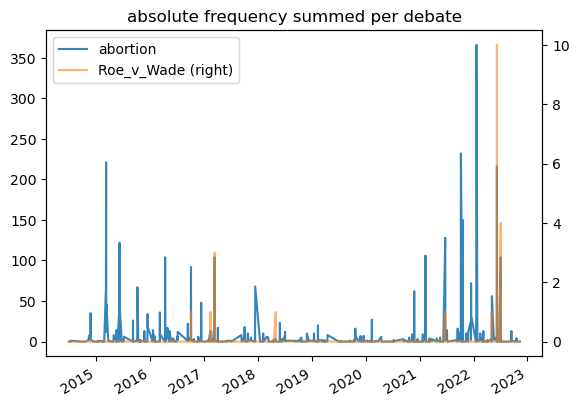

In [75]:
fig, ax = plt.subplots()
df_summed.plot(title='absolute frequency summed per debate', kind='line', y="abortion", ax = ax, alpha=0.9,xlabel='')
df_summed.plot(kind='line', y = "Roe_v_Wade", ax = ax, secondary_y = True, alpha=0.6,xlabel='') 
#df_summed.plot(kind='line', y = "women_rights", ax = ax, secondary_y = True, alpha=0.4) 
#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/abortion_row-vs-wade.png')

In [76]:
df_summed_bydate = df.groupby(["date", "gender"]).sum()
df_summed_bydate

C:\Users\Katharina\AppData\Local\Temp\ipykernel_11876\279795624.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_summed_bydate = df.groupby(["date", "gender"]).sum()


is_mep  party  birth_year  iran_revolution  women  \
date       gender                                                      
2014-07-01 F            3    0.0        5884                0      1   
           M           19    0.0       37221                0      1   
2014-07-02 F           37    0.0       72564                0      8   
           M          103    0.0      201702                0      5   
2014-07-03 M            1    0.0        1955                0      0   
...                   ...    ...         ...              ...    ...   
2022-10-20 M           58    0.0      113949                0      2   
2022-11-09 F           98    0.0      193366                1     19   
           M          143    0.0      282063                2      7   
2022-11-10 F           43    0.0       84768                0      9   
           M           40    0.0       78754                0      3   

                   gender_pay_gap  equality  care_work  abortion  \
date       gender                                                  
2014-07-01 F                    0         0          0         0   
           M                    0         0          0         0   
2014-07-02 F                    1         2          1         0   
           M                    0         3          0         0   
2014-07-03 M                    0         0          0         0   
...                           ...       ...        ...       ...   
2022-10-20 M                    0         0          0         0   
2022-11-09 F                    0         2          0         0   
           M                    0         5          0         0   
2022-11-10 F                    0         1          0         0   
           M                    0         7          0         0   

                   women_rights  men  people  Roe_v_Wade  count  
date       gender                                                
2014-07-01 F                  0    0    5107           0     66  
           M                  0    1   20035           0    418  
2014-07-02 F                  0    4   49315           0   5550  
           M                  1    7  127534           0  15450  
2014-07-03 M                  0    0      68           0      1  
...                         ...  ...     ...         ...    ...  
2022-10-20 M                  0    4   65878           0   6322  
2022-11-09 F                  0    4  102789           0  26754  
           M                  0    2  164509           0  39039  
2022-11-10 F                  1    2   39131           0   4042  
           M                  0    2   37348           0   3760  

[917 rows x 14 columns]

In [77]:
# summed by debate - split by gender
df_summed_bydate = df_summed_bydate.drop('count', axis=1)
df_summed_bydate = df_summed_bydate.drop('birth_year', axis=1)
df_summed_bydate = df_summed_bydate.drop('iran_revolution', axis=1)
df_summed_bydate = df_summed_bydate.drop('women', axis=1)
df_summed_bydate = df_summed_bydate.drop('gender_pay_gap', axis=1)
df_summed_bydate = df_summed_bydate.drop('equality', axis=1)
df_summed_bydate = df_summed_bydate.drop('care_work', axis=1)
df_summed_bydate = df_summed_bydate.drop('men', axis=1)
df_summed_bydate = df_summed_bydate.drop('people', axis=1)
df_summed_bydate = df_summed_bydate.drop('is_mep', axis=1)
df_summed_bydate = df_summed_bydate.drop('party', axis=1)
df_summed_bydate


abortion  women_rights  Roe_v_Wade
date       gender                                    
2014-07-01 F              0             0           0
           M              0             0           0
2014-07-02 F              0             0           0
           M              0             1           0
2014-07-03 M              0             0           0
...                     ...           ...         ...
2022-10-20 M              0             0           0
2022-11-09 F              0             0           0
           M              0             0           0
2022-11-10 F              0             1           0
           M              0             0           0

[917 rows x 3 columns]

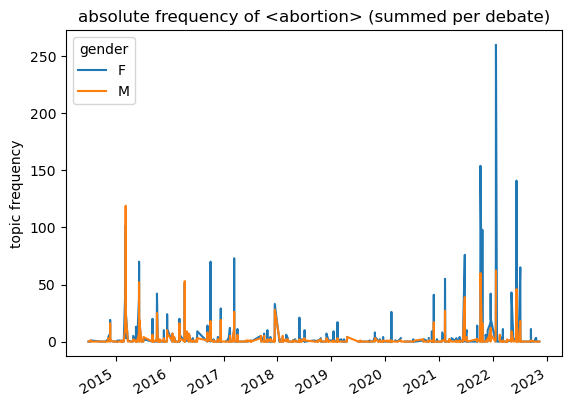

In [78]:
#absolute

df_summed_bydate_1 = df_summed_bydate.unstack().plot(y='abortion', kind = 'line', title='absolute frequency of <abortion> (summed per debate)',xlabel='',ylabel='topic frequency')#.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), prop={'size': 6})

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/abortion_by-gender-debate.png')

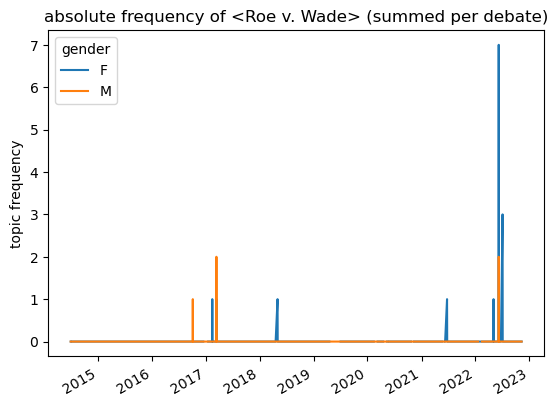

In [79]:
#absolute

df_summed_bydate_2 = df_summed_bydate.unstack().plot(y='Roe_v_Wade', kind = 'line', title='absolute frequency of <Roe v. Wade> (summed per debate)',xlabel='',ylabel='topic frequency')#.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), prop={'size': 6})

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/Roe_v_Wade-by-gender-debate.png')

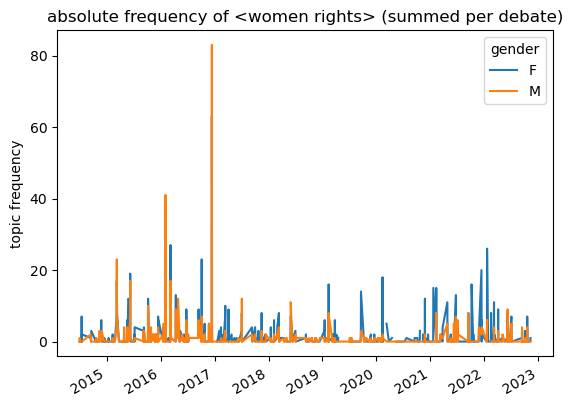

In [80]:
#absolute
df_summed_bydate_3 = df_summed_bydate.unstack().plot(y='women_rights', kind = 'line', title='absolute frequency of <women rights> (summed per debate)',xlabel='',ylabel='topic frequency')#.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), prop={'size': 6})

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/women_rights-by-gender-debate.png')

###### relative

In [81]:
df_relative_summed_bydate = df.groupby( ["date", "gender"]).agg({'abortion': np.sum, 
                                                             'women_rights': np.sum, 
                                                             'Roe_v_Wade': np.sum,
                                                              'count': 'first'})
df_relative_summed_bydate

abortion  women_rights  Roe_v_Wade  count
date       gender                                           
2014-07-01 F              0             0           0     22
           M              0             0           0     22
2014-07-02 F              0             0           0    150
           M              0             1           0    150
2014-07-03 M              0             0           0      1
...                     ...           ...         ...    ...
2022-10-20 M              0             0           0    109
2022-11-09 F              0             0           0    273
           M              0             0           0    273
2022-11-10 F              0             1           0     94
           M              0             0           0     94

[917 rows x 4 columns]

In [82]:
df_relative_share_summed_bydate = df_relative_summed_bydate

In [83]:
# calculating relative share of frequencies by number of interventions
df_relative_share_summed_bydate['abortion'] = df_relative_share_summed_bydate['abortion']/df_relative_share_summed_bydate['count']
df_relative_share_summed_bydate['women_rights'] = df_relative_share_summed_bydate['women_rights']/df_relative_share_summed_bydate['count']
df_relative_share_summed_bydate['Roe_v_Wade'] = df_relative_share_summed_bydate['Roe_v_Wade']/df_relative_share_summed_bydate['count']
df_relative_share_summed_bydate

abortion  women_rights  Roe_v_Wade  count
date       gender                                           
2014-07-01 F            0.0      0.000000         0.0     22
           M            0.0      0.000000         0.0     22
2014-07-02 F            0.0      0.000000         0.0    150
           M            0.0      0.006667         0.0    150
2014-07-03 M            0.0      0.000000         0.0      1
...                     ...           ...         ...    ...
2022-10-20 M            0.0      0.000000         0.0    109
2022-11-09 F            0.0      0.000000         0.0    273
           M            0.0      0.000000         0.0    273
2022-11-10 F            0.0      0.010638         0.0     94
           M            0.0      0.000000         0.0     94

[917 rows x 4 columns]

In [84]:
df_relative_share_summed_bydate_plot = df_relative_share_summed_bydate
df_relative_share_summed_bydate_plot = df_relative_share_summed_bydate_plot.drop('count', axis=1)
df_relative_share_summed_bydate_plot

abortion  women_rights  Roe_v_Wade
date       gender                                    
2014-07-01 F            0.0      0.000000         0.0
           M            0.0      0.000000         0.0
2014-07-02 F            0.0      0.000000         0.0
           M            0.0      0.006667         0.0
2014-07-03 M            0.0      0.000000         0.0
...                     ...           ...         ...
2022-10-20 M            0.0      0.000000         0.0
2022-11-09 F            0.0      0.000000         0.0
           M            0.0      0.000000         0.0
2022-11-10 F            0.0      0.010638         0.0
           M            0.0      0.000000         0.0

[917 rows x 3 columns]

In [85]:
df_relative_share_summed_bydate

abortion  women_rights  Roe_v_Wade  count
date       gender                                           
2014-07-01 F            0.0      0.000000         0.0     22
           M            0.0      0.000000         0.0     22
2014-07-02 F            0.0      0.000000         0.0    150
           M            0.0      0.006667         0.0    150
2014-07-03 M            0.0      0.000000         0.0      1
...                     ...           ...         ...    ...
2022-10-20 M            0.0      0.000000         0.0    109
2022-11-09 F            0.0      0.000000         0.0    273
           M            0.0      0.000000         0.0    273
2022-11-10 F            0.0      0.010638         0.0     94
           M            0.0      0.000000         0.0     94

[917 rows x 4 columns]

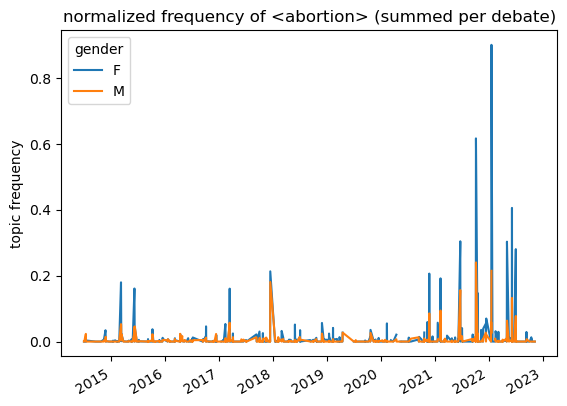

In [86]:
#normalized
df_relative_share_summed_bydate_plot_1 = df_relative_share_summed_bydate_plot.unstack().plot(y='abortion', kind = 'line', title='normalized frequency of <abortion> (summed per debate)',xlabel='',ylabel='topic frequency')#.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), prop={'size': 6})

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/abortion_by-gender-debate_normalized.png')

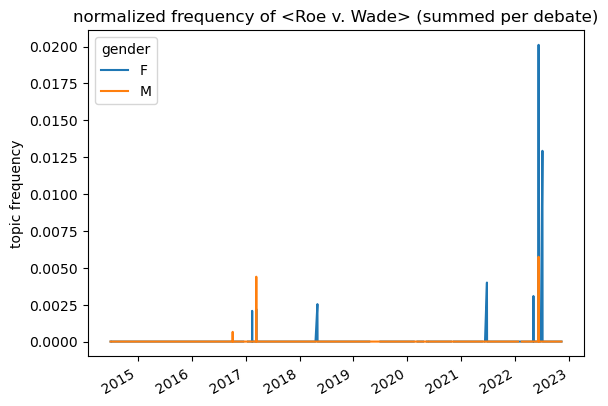

In [87]:
#normalized
df_relative_share_summed_bydate_plot_2 = df_relative_share_summed_bydate_plot.unstack().plot(y='Roe_v_Wade', kind = 'line', title='normalized frequency of <Roe v. Wade> (summed per debate)',xlabel='',ylabel='topic frequency')#.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), prop={'size': 6})

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/Roe_v_Wade-by-gender-debate_normalized.png')

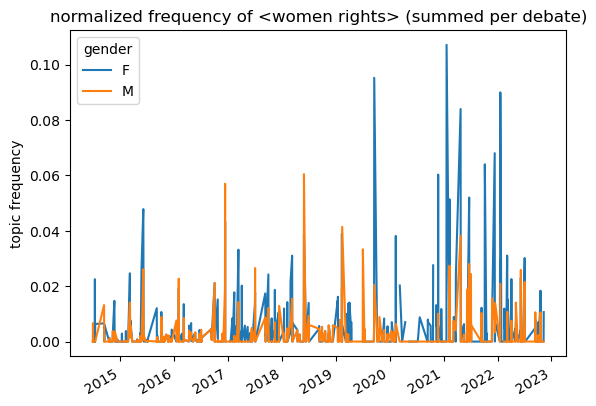

In [88]:
#normalized

df_relative_share_summed_bydate_plot_3 = df_relative_share_summed_bydate_plot.unstack().plot(y='women_rights', kind = 'line', title='normalized frequency of <women rights> (summed per debate)',xlabel='',ylabel='topic frequency')#.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), prop={'size': 6})

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/women_rights-by-gender-debate_normalized.png')

### political group -  by year

In [89]:
df_Y = df
df_Y = df_Y.assign(Y = df_Y.date)
df_Y['Y'] = df_Y.Y.dt.strftime('%Y')
#df_Y['Y'] = pd.to_datetime(df_Y['Y'], format='%Y')
df_Y.head()

,int_id,debate_id,date,speaker,is_mep,text,speaker_id,role,party,text_translated,...,gender_pay_gap,equality,care_work,abortion,women_rights,men,people,Roe_v_Wade,count,Y
0,2-008-000,20140701.EN,2014-07-01,Presidente,True,Ringrazio il maestro e tutta l'orchestra. Ric...,4436,NaN,NaN,I thank the master and the whole orchestra.I r...,...,0,0,0,0,0,0,2976,0,22,2014
2,2-010-000,20140701.EN,2014-07-01,Sajjad Karim,True,"Mr President, I rise to speak with a sense of...",28481,NaN,NaN,"Mr President, I rise to speak with a sense of ...",...,0,0,0,0,0,0,4467,0,22,2014
3,2-011-000,20140701.EN,2014-07-01,Ulrike Lunacek,True,"Mr President, firstly let me welcome all the ...",97017,NaN,NaN,"Mr President, firstly let me welcome all the n...",...,0,0,0,0,0,0,4050,0,22,2014
4,2-013-000,20140701.EN,2014-07-01,Martin Schulz,True,"Herr Präsident, meine sehr geehrten Damen und...",1911,NaN,NaN,"Mr. President, my dear ladies and gentlemen, d...",...,0,0,0,0,0,1,3479,0,22,2014
5,2-014-000,20140701.EN,2014-07-01,Beatrix von Storch,True,Herr Präsident! Mein Name ist Beatrix von Sto...,124825,NaN,NaN,Mister President!My name is Beatrix von Storch...,...,0,0,0,0,0,0,547,0,22,2014


In [90]:
df_Y_polgroup = df_Y
df_Y_polgroup["EU political group"] = df_Y_polgroup["EU political group"].replace("European Conservatives and Reformists Group", "Conservatives")
df_Y_polgroup["EU political group"] = df_Y_polgroup["EU political group"].replace("Group of the European People's Party (Christian Democrats)", "Christian Democrats")
df_Y_polgroup["EU political group"] = df_Y_polgroup["EU political group"].replace("Group of the Greens/European Free Alliance", "Greens")
df_Y_polgroup["EU political group"] = df_Y_polgroup["EU political group"].replace("Group of the Progressive Alliance of Socialists and Democrats in the European Parliament", "Socialists")
df_Y_polgroup["EU political group"] = df_Y_polgroup["EU political group"].replace("Identity and Democracy Group", "Identity")
df_Y_polgroup["EU political group"] = df_Y_polgroup["EU political group"].replace("Non-attached Members", "Non-attached Members")
df_Y_polgroup["EU political group"] = df_Y_polgroup["EU political group"].replace("Renew Europe Group", "Renew Europe")
df_Y_polgroup["EU political group"] = df_Y_polgroup["EU political group"].replace("The Left group in the European Parliament - GUE/NGL", "Lefts")

In [91]:
df_Y_polgroup = df_Y.groupby(["Y", "EU political group"]).sum()
df_Y_polgroup

C:\Users\Katharina\AppData\Local\Temp\ipykernel_11876\669255846.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_Y_polgroup = df_Y.groupby(["Y", "EU political group"]).sum()


is_mep  party  birth_year  iran_revolution  women  \
Y    EU political group                                                        
2014 Christian Democrats     1406    0.0     2766054                0     61   
     Conservatives            154    0.0      302229                0      8   
     Greens                   297    0.0      586209                0     43   
     Identity                 318    0.0      625035                0     21   
     Lefts                    189    0.0      372041                0     29   
...                           ...    ...         ...              ...    ...   
2022 Identity                 697    0.0     1318993                6    298   
     Lefts                    939    0.0     1801701                2    366   
     Non-attached Members     641    0.0     1129435                6     93   
     Renew Europe            1727    0.0     3151092               16    505   
     Socialists              2500    0.0     4601961               11    910   

                           gender_pay_gap  equality  care_work  abortion  \
Y    EU political group                                                    
2014 Christian Democrats                0        13         11         2   
     Conservatives                      0         4          0         0   
     Greens                             0        15          2         2   
     Identity                           0         8          0         0   
     Lefts                              0        14          1         2   
...                                   ...       ...        ...       ...   
2022 Identity                           0        19          0        32   
     Lefts                              1        56          0       105   
     Non-attached Members               1        19          0        21   
     Renew Europe                       2        65          3       119   
     Socialists                         5       216          7       224   

                           women_rights  men   people  Roe_v_Wade    count  
Y    EU political group                                                     
2014 Christian Democrats              1   23  1239854           0  1456543  
     Conservatives                    0    6   149737           0   124471  
     Greens                           1    7   299206           0   271299  
     Identity                         0    9   238900           0   374652  
     Lefts                            4    6   148882           0   215203  
...                                 ...  ...      ...         ...      ...  
2022 Identity                         7   80   997467           1   238775  
     Lefts                           28   67  1155840           3   300232  
     Non-attached Members             3   34   682381           0   228502  
     Renew Europe                    27   78  1989896           4   610398  
     Socialists                      35  154  2938453           2   877446  

[72 rows x 14 columns]

In [92]:
# dropping all irrelevant columns

df_Y_polgroup = df_Y_polgroup.drop('count', axis=1)
df_Y_polgroup = df_Y_polgroup.drop('birth_year', axis=1)
df_Y_polgroup = df_Y_polgroup.drop('iran_revolution', axis=1)
df_Y_polgroup = df_Y_polgroup.drop('women', axis=1)
df_Y_polgroup = df_Y_polgroup.drop('gender_pay_gap', axis=1)
df_Y_polgroup = df_Y_polgroup.drop('equality', axis=1)
df_Y_polgroup = df_Y_polgroup.drop('care_work', axis=1)
df_Y_polgroup = df_Y_polgroup.drop('men', axis=1)
df_Y_polgroup = df_Y_polgroup.drop('people', axis=1)
df_Y_polgroup = df_Y_polgroup.drop('is_mep', axis=1)
df_Y_polgroup = df_Y_polgroup.drop('party', axis=1)
df_Y_polgroup


abortion  women_rights  Roe_v_Wade
Y    EU political group                                      
2014 Christian Democrats          2             1           0
     Conservatives                0             0           0
     Greens                       2             1           0
     Identity                     0             0           0
     Lefts                        2             4           0
...                             ...           ...         ...
2022 Identity                    32             7           1
     Lefts                      105            28           3
     Non-attached Members        21             3           0
     Renew Europe               119            27           4
     Socialists                 224            35           2

[72 rows x 3 columns]

<AxesSubplot: title={'center': 'frequency of <abortion> by political party per year'}, ylabel='topic frequency'>

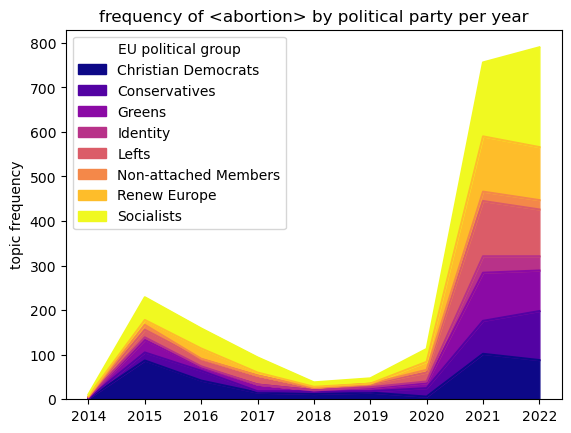

In [93]:
df_Y_polgroup_plot = df_Y_polgroup.unstack()
df_Y_polgroup_plot.plot(y='abortion', kind='area', title='frequency of <abortion> by political party per year',xlabel='',ylabel='topic frequency', cmap="plasma")

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/abortion_by-politgroup_1.png')

<AxesSubplot: title={'center': 'frequency of <Roe v. Wade> by political party per year'}, ylabel='topic frequency'>

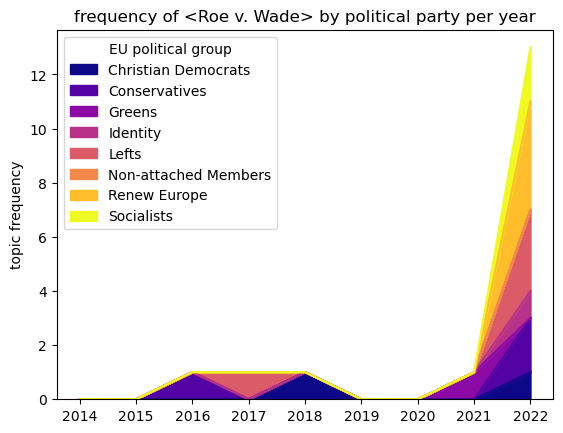

In [94]:
df_Y_polgroup_plot = df_Y_polgroup.unstack()
df_Y_polgroup_plot.plot(y='Roe_v_Wade', kind='area', title='frequency of <Roe v. Wade> by political party per year',xlabel='',ylabel='topic frequency',cmap="plasma")

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/Roe-v-Wade-_by-politgroup_1.png')

<AxesSubplot: title={'center': 'frequency of <women rights> by political party per year'}, ylabel='topic frequency'>

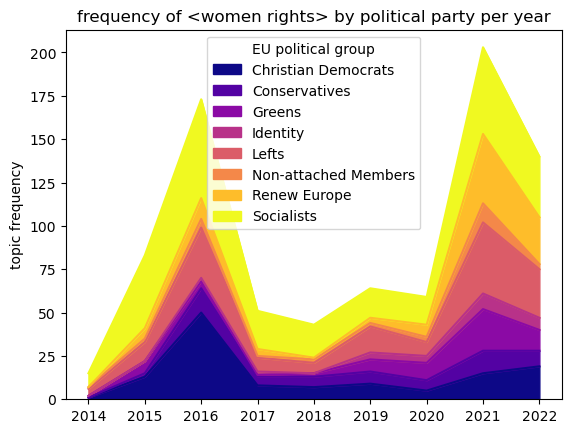

In [95]:
df_Y_polgroup_plot = df_Y_polgroup.unstack()
df_Y_polgroup_plot.plot(y='women_rights', kind='area', title='frequency of <women rights> by political party per year',xlabel='',ylabel='topic frequency',cmap="plasma")

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/women-rights_by-politgroup_1.png')

### normalized by number of seats per political group

In [96]:
df_Y_norm = df_Y
df_Y_norm = df_Y_norm.drop('count', axis=1)
df_Y_norm = df_Y_norm.drop('language', axis=1)
df_Y_norm = df_Y_norm.drop('full Name', axis=1)
df_Y_norm = df_Y_norm.drop('national political group', axis=1)
df_Y_norm = df_Y_norm.drop('birth_year', axis=1)
df_Y_norm = df_Y_norm.drop('gender', axis=1)
df_Y_norm = df_Y_norm.drop('nationalty', axis=1)
df_Y_norm = df_Y_norm.drop('birth_place', axis=1)
df_Y_norm = df_Y_norm.drop('iran_revolution', axis=1)
df_Y_norm = df_Y_norm.drop('women', axis=1)
df_Y_norm = df_Y_norm.drop('gender_pay_gap', axis=1)
df_Y_norm = df_Y_norm.drop('equality', axis=1)
df_Y_norm = df_Y_norm.drop('care_work', axis=1)
df_Y_norm = df_Y_norm.drop('men', axis=1)
df_Y_norm = df_Y_norm.drop('people', axis=1)
df_Y_norm = df_Y_norm.drop('is_mep', axis=1)
df_Y_norm = df_Y_norm.drop('party', axis=1)
df_Y_norm = df_Y_norm.drop('national_parties', axis=1)
df_Y_norm = df_Y_norm.drop('political_groups', axis=1)
df_Y_norm = df_Y_norm.drop('country', axis=1)
df_Y_norm = df_Y_norm.drop('text_translated', axis=1)
df_Y_norm = df_Y_norm.drop('role', axis=1)
df_Y_norm = df_Y_norm.drop('speaker', axis=1)
df_Y_norm = df_Y_norm.drop('int_id', axis=1)
df_Y_norm = df_Y_norm.drop('text', axis=1)
df_Y_norm = df_Y_norm.drop('date', axis=1)
df_Y_norm

,debate_id,speaker_id,EU political group,abortion,women_rights,Roe_v_Wade,Y
0,20140701.EN,4436,NaN,0,0,0,2014
2,20140701.EN,28481,NaN,0,0,0,2014
3,20140701.EN,97017,NaN,0,0,0,2014
4,20140701.EN,1911,NaN,0,0,0,2014
5,20140701.EN,124825,NaN,0,0,0,2014
...,...,...,...,...,...,...,...
275091,20220216.EN,197654,Greens,0,0,0,2022
275092,20220216.EN,28615,Conservatives,0,0,0,2022
275093,20220216.EN,photo_generic,NaN,0,0,0,2022
275094,20220216.EN,28615,Conservatives,0,0,0,2022


In [97]:
# extracting all values that are not na for EU political group
df_Y_norm_polgroup = df_Y_norm[df_Y_norm['EU political group'].notna()]
df_Y_norm_polgroup

,debate_id,speaker_id,EU political group,abortion,women_rights,Roe_v_Wade,Y
14,20140701.EN,28229,Christian Democrats,0,0,0,2014
16,20140701.EN,96648,Greens,0,0,0,2014
19,20140701.EN,96842,Socialists,0,0,0,2014
27,20140702.EN,28229,Christian Democrats,0,0,0,2014
32,20140702.EN,97058,Renew Europe,0,0,0,2014
...,...,...,...,...,...,...,...
275090,20220216.EN,197756,Socialists,0,0,0,2022
275091,20220216.EN,197654,Greens,0,0,0,2022
275092,20220216.EN,28615,Conservatives,0,0,0,2022
275094,20220216.EN,28615,Conservatives,0,0,0,2022


In [98]:
# convert to integer
df_Y_norm_polgroup['Y'] = df_Y_norm_polgroup['Y'].astype(np.int64)

C:\Users\Katharina\AppData\Local\Temp\ipykernel_11876\2863889812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Y_norm_polgroup['Y'] = df_Y_norm_polgroup['Y'].astype(np.int64)


In [99]:
mask1 = ((df_Y_norm_polgroup['Y'] < 2019) & (df_Y_norm_polgroup['EU political group'] == 'Christian Democrats'))

In [100]:
df_Y_norm_polgroup['seats'] = '216' if mask1.any() else '0'

C:\Users\Katharina\AppData\Local\Temp\ipykernel_11876\3518436596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Y_norm_polgroup['seats'] = '216' if mask1.any() else '0'


In [101]:
# define a custom function to apply to each row of the DataFrame
def conditional_value(row):
    if row['Y'] < 2019 and row['EU political group'] == 'Christian Democrats':
        return '216'
    elif row['Y'] < 2019 and row['EU political group'] == 'Conservatives':
        return '77'
    elif row['Y'] < 2019 and row['EU political group'] == 'Greens':
        return '52'
    elif row['Y'] < 2019 and row['EU political group'] == 'Identity':
        return '113' #ECR 77+ ENF 36
    elif row['Y'] < 2019 and row['EU political group'] == 'Lefts':
        return '52'
    elif row['Y'] < 2019 and row['EU political group'] == 'Non-attached Members':
        return '20'
    elif row['Y'] < 2019 and row['EU political group'] == 'Renew Europe':
        return '111' # ADLDE 69 + EFDD 42
    elif row['Y'] < 2019 and row['EU political group'] == 'Socialists':
        return '185'                                                                     #from 2019
    elif row['Y'] > 2018 and row['EU political group'] == 'Christian Democrats':
        return '182'
    elif row['Y'] > 2018 and row['EU political group'] == 'Conservatives':
        return '62'
    elif row['Y'] > 2018 and row['EU political group'] == 'Greens':
        return '74'
    elif row['Y'] > 2018 and row['EU political group'] == 'Identity':
        return '73' 
    elif row['Y'] > 2018 and row['EU political group'] == 'Lefts':
        return '41'
    elif row['Y'] > 2018 and row['EU political group'] == 'Non-attached Members':
        return '57'
    elif row['Y'] > 2018 and row['EU political group'] == 'Renew Europe':
        return '108' 
    elif row['Y'] > 2018 and row['EU political group'] == 'Socialists':
        return '154'
    else:
        return 'not matched'

In [102]:
# apply the custom function to each row of the DataFrame and assign the result to a new column
df_Y_norm_polgroup['seats'] = df_Y_norm_polgroup.apply(conditional_value, axis=1)
df_Y_norm_polgroup

C:\Users\Katharina\AppData\Local\Temp\ipykernel_11876\2185604766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Y_norm_polgroup['seats'] = df_Y_norm_polgroup.apply(conditional_value, axis=1)


,debate_id,speaker_id,EU political group,abortion,women_rights,Roe_v_Wade,Y,seats
14,20140701.EN,28229,Christian Democrats,0,0,0,2014,216
16,20140701.EN,96648,Greens,0,0,0,2014,52
19,20140701.EN,96842,Socialists,0,0,0,2014,185
27,20140702.EN,28229,Christian Democrats,0,0,0,2014,216
32,20140702.EN,97058,Renew Europe,0,0,0,2014,111
...,...,...,...,...,...,...,...,...
275090,20220216.EN,197756,Socialists,0,0,0,2022,154
275091,20220216.EN,197654,Greens,0,0,0,2022,74
275092,20220216.EN,28615,Conservatives,0,0,0,2022,62
275094,20220216.EN,28615,Conservatives,0,0,0,2022,62


In [103]:
df_Y_norm_polgroup

,debate_id,speaker_id,EU political group,abortion,women_rights,Roe_v_Wade,Y,seats
14,20140701.EN,28229,Christian Democrats,0,0,0,2014,216
16,20140701.EN,96648,Greens,0,0,0,2014,52
19,20140701.EN,96842,Socialists,0,0,0,2014,185
27,20140702.EN,28229,Christian Democrats,0,0,0,2014,216
32,20140702.EN,97058,Renew Europe,0,0,0,2014,111
...,...,...,...,...,...,...,...,...
275090,20220216.EN,197756,Socialists,0,0,0,2022,154
275091,20220216.EN,197654,Greens,0,0,0,2022,74
275092,20220216.EN,28615,Conservatives,0,0,0,2022,62
275094,20220216.EN,28615,Conservatives,0,0,0,2022,62


In [104]:
# convert to integer
df_Y_norm_polgroup['seats'] = df_Y_norm_polgroup['seats'].astype(np.int64)

C:\Users\Katharina\AppData\Local\Temp\ipykernel_11876\457769035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Y_norm_polgroup['seats'] = df_Y_norm_polgroup['seats'].astype(np.int64)


In [105]:
df_Y_norm_polgroup_grpd = df_Y_norm_polgroup.groupby(["Y", "EU political group"]).agg({'abortion': np.sum, 
                                                             'women_rights': np.sum, 
                                                             'Roe_v_Wade': np.sum, 
                                                              'seats': 'first'})
df_Y_norm_polgroup_grpd.head(20)

abortion  women_rights  Roe_v_Wade  seats
Y    EU political group                                             
2014 Christian Democrats          2             1           0    216
     Conservatives                0             0           0     77
     Greens                       2             1           0     52
     Identity                     0             0           0    113
     Lefts                        2             4           0     52
     Non-attached Members         0             1           0     20
     Renew Europe                 1             0           0    111
     Socialists                   4             8           0    185
2015 Christian Democrats         87            13           0    216
     Conservatives               18             2           0     77
     Greens                      28             7           0     52
     Identity                     6             0           0    113
     Lefts                       17            11           0     52
     Non-attached Members        11             2           0     20
     Renew Europe                11             6           0    111
     Socialists                  51            42           0    185
2016 Christian Democrats         42            50           0    216
     Conservatives               22            14           1     77
     Greens                       8             4           0     52
     Identity                     2             2           0    113

In [106]:
df_Y_norm_polgroup_grpd_norm = df_Y_norm_polgroup_grpd
df_Y_norm_polgroup_grpd_norm['abortion'] = df_Y_norm_polgroup_grpd_norm['abortion']/df_Y_norm_polgroup_grpd_norm['seats']
df_Y_norm_polgroup_grpd_norm['women_rights'] = df_Y_norm_polgroup_grpd_norm['women_rights']/df_Y_norm_polgroup_grpd_norm['seats']
df_Y_norm_polgroup_grpd_norm['Roe_v_Wade'] = df_Y_norm_polgroup_grpd_norm['Roe_v_Wade']/df_Y_norm_polgroup_grpd_norm['seats']
df_Y_norm_polgroup_grpd_norm

abortion  women_rights  Roe_v_Wade  seats
Y    EU political group                                             
2014 Christian Democrats   0.009259      0.004630    0.000000    216
     Conservatives         0.000000      0.000000    0.000000     77
     Greens                0.038462      0.019231    0.000000     52
     Identity              0.000000      0.000000    0.000000    113
     Lefts                 0.038462      0.076923    0.000000     52
...                             ...           ...         ...    ...
2022 Identity              0.438356      0.095890    0.013699     73
     Lefts                 2.560976      0.682927    0.073171     41
     Non-attached Members  0.368421      0.052632    0.000000     57
     Renew Europe          1.101852      0.250000    0.037037    108
     Socialists            1.454545      0.227273    0.012987    154

[72 rows x 4 columns]

In [107]:
df_Y_norm_polgroup_grpd_norm_plot = df_Y_norm_polgroup_grpd_norm.drop('seats', axis=1)
df_Y_norm_polgroup_grpd_norm_plot

abortion  women_rights  Roe_v_Wade
Y    EU political group                                      
2014 Christian Democrats   0.009259      0.004630    0.000000
     Conservatives         0.000000      0.000000    0.000000
     Greens                0.038462      0.019231    0.000000
     Identity              0.000000      0.000000    0.000000
     Lefts                 0.038462      0.076923    0.000000
...                             ...           ...         ...
2022 Identity              0.438356      0.095890    0.013699
     Lefts                 2.560976      0.682927    0.073171
     Non-attached Members  0.368421      0.052632    0.000000
     Renew Europe          1.101852      0.250000    0.037037
     Socialists            1.454545      0.227273    0.012987

[72 rows x 3 columns]

<AxesSubplot: title={'center': 'frequency of <abortion> by political party per year - normalized'}, ylabel='topic frequency'>

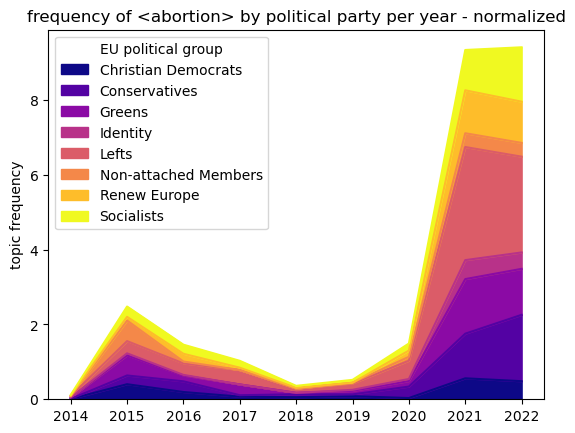

In [108]:
df_Y_norm_polgroup_grpd_norm_plot1 = df_Y_norm_polgroup_grpd_norm_plot.unstack()
df_Y_norm_polgroup_grpd_norm_plot1.plot(y='abortion', kind='area', title='frequency of <abortion> by political party per year - normalized',xlabel='',ylabel='topic frequency', cmap="plasma")

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/abortion_by-politgroup_norm_1.png')

<AxesSubplot: title={'center': 'frequency of <women rights> by political party per year - normalized'}, ylabel='topic frequency'>

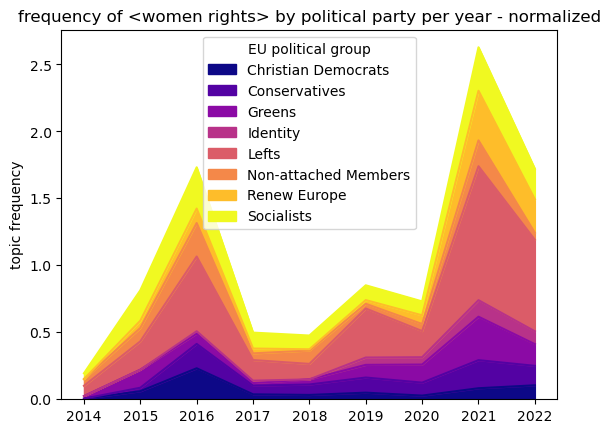

In [109]:
df_Y_norm_polgroup_grpd_norm_plot2 = df_Y_norm_polgroup_grpd_norm_plot.unstack()
df_Y_norm_polgroup_grpd_norm_plot2.plot(y='women_rights', kind='area', title='frequency of <women rights> by political party per year - normalized',xlabel='',ylabel='topic frequency', cmap="plasma")

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/womenrights_by-politgroup_norm_3.png')

<AxesSubplot: title={'center': 'frequency of <Roe v. Wade> by political party per year - normalized'}, ylabel='topic frequency'>

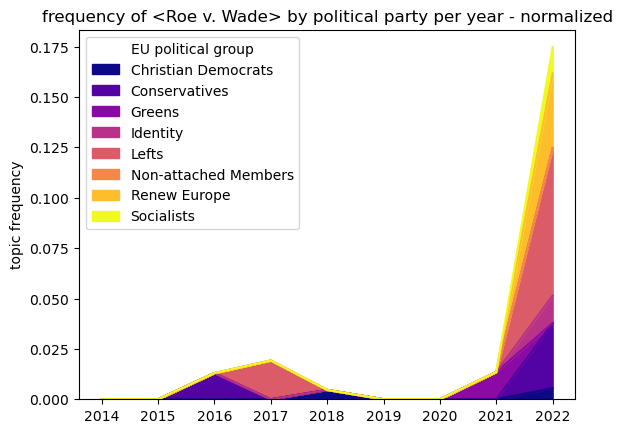

In [110]:
df_Y_norm_polgroup_grpd_norm_plot2 = df_Y_norm_polgroup_grpd_norm_plot.unstack()
df_Y_norm_polgroup_grpd_norm_plot2.plot(y='Roe_v_Wade', kind='area', title='frequency of <Roe v. Wade> by political party per year - normalized',xlabel='',ylabel='topic frequency', cmap="plasma")

#plt.savefig('C:/Users/Katharina/Documents/Uni/6_WS2223/Masterarbeit/code/WomenInEP/plots/abortion_by-politgroup_norm_2.png')

# Roe_v_Wade (abortion, women_rights)

In [111]:
df_abortion = df_summed
df_abortion = df_abortion.drop('iran_revolution', axis=1)
df_abortion = df_abortion.drop('women', axis=1)
df_abortion = df_abortion.drop('gender_pay_gap', axis=1)
df_abortion = df_abortion.drop('equality', axis=1)
df_abortion = df_abortion.drop('care_work', axis=1)
df_abortion = df_abortion.drop('men', axis=1)

df_abortion

,abortion,women_rights,Roe_v_Wade
date,,,
2014-07-01,0,0,0
2014-07-02,0,1,0
2014-07-03,0,0,0
2014-07-14,1,0,0
2014-07-15,0,7,0
...,...,...,...
2022-10-18,1,1,0
2022-10-19,4,11,0
2022-10-20,0,0,0


In [112]:
# high frequency in abortion AND Roe v Wade
df_highabortion_1 = df_abortion[df_abortion['abortion']>50 ]
df_highabortion_1 = df_highabortion_1[df_highabortion_1['Roe_v_Wade']>0]
df_highabortion_1 

,abortion,women_rights,Roe_v_Wade
date,,,
2016-10-05,92,30,1
2017-03-14,104,11,3
2021-06-23,128,21,1
2022-06-08,216,21,10
2022-07-04,104,13,4


In [113]:
df_highabortion_2 = df_abortion[df_abortion['abortion']>150 ]
df_highabortion_2

,abortion,women_rights,Roe_v_Wade
date,,,
2015-03-10,221,41,0
2021-10-07,232,16,0
2022-01-20,366,32,0
2022-06-08,216,21,10


In [114]:
df_highabortion_3 = df_abortion[df_abortion['Roe_v_Wade']>0 ]
df_highabortion_3

,abortion,women_rights,Roe_v_Wade
date,,,
2016-10-05,92,30,1
2017-02-14,13,1,1
2017-03-14,104,11,3
2018-05-02,3,2,1
2021-06-23,128,21,1
2022-05-04,8,1,1
2022-06-08,216,21,10
2022-07-04,104,13,4


In [115]:
df_RoevWade = df_summed_gender_age
df_RoevWade = df_RoevWade.drop('int_id', axis=1)
df_RoevWade = df_RoevWade.drop('is_mep', axis=1)
df_RoevWade = df_RoevWade.drop('speaker_id', axis=1)
df_RoevWade = df_RoevWade.drop('role', axis=1)
df_RoevWade = df_RoevWade.drop('party', axis=1)
df_RoevWade = df_RoevWade.drop('full Name', axis=1) 
df_RoevWade = df_RoevWade.drop('gender_pay_gap', axis=1)
df_RoevWade = df_RoevWade.drop('equality', axis=1)
df_RoevWade = df_RoevWade.drop('care_work', axis=1)
df_RoevWade = df_RoevWade.drop('iran_revolution', axis=1)
df_RoevWade = df_RoevWade.drop('women', axis=1)
df_RoevWade = df_RoevWade.drop('men', axis=1)
df_RoevWade = df_RoevWade.drop('people', axis=1)
df_RoevWade

,debate_id,date,speaker,text,text_translated,language,country,EU political group,national political group,nationalty,gender,birth_year,birth_place,political_groups,national_parties,abortion,women_rights,Roe_v_Wade,debate_year,age_atDebate
0,20140701.EN,2014-07-01,Presidente,Ringrazio il maestro e tutta l'orchestra. Ric...,I thank the master and the whole orchestra.I r...,it,NaN,NaN,NaN,Italy,M,1958,Lauria (PZ),20-07-1999 / 19-07-2004 : Group of the Party o...,20-07-1999 / 19-07-2004 : Democratici di Sinis...,0,0,0,2014,56
2,20140701.EN,2014-07-01,Sajjad Karim,"Mr President, I rise to speak with a sense of...","Mr President, I rise to speak with a sense of ...",en,NaN,NaN,NaN,United Kingdom,M,1970,Lancashire,20-07-2004 / 11-12-2007 : Group of the Allianc...,20-07-2004 / 13-07-2009 : UK Independence Part...,0,0,0,2014,44
3,20140701.EN,2014-07-01,Ulrike Lunacek,"Mr President, firstly let me welcome all the ...","Mr President, firstly let me welcome all the n...",en,NaN,NaN,NaN,Austria,F,1957,Krems a.d. Donau,14-07-2009 / 04-02-2013 : Group of the Greens/...,14-07-2009 / 30-06-2014 : Die Grünen - Die Grü...,0,0,0,2014,57
4,20140701.EN,2014-07-01,Martin Schulz,"Herr Präsident, meine sehr geehrten Damen und...","Mr. President, my dear ladies and gentlemen, d...",de,NaN,NaN,NaN,Germany,M,1955,Hehlrath,19-07-1994 / 19-07-1999 : Group of the Party o...,19-07-1994 / 19-07-1999 : Sozialdemokratische ...,0,0,0,2014,59
5,20140701.EN,2014-07-01,Beatrix von Storch,Herr Präsident! Mein Name ist Beatrix von Sto...,Mister President!My name is Beatrix von Storch...,de,NaN,NaN,NaN,Germany,F,1971,Lübeck,01-07-2014 / 07-04-2016 : European Conservativ...,01-07-2014 / 23-10-2017 : Alternative für Deut...,0,0,0,2014,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275090,20220216.EN,2022-02-16,Vera Tax,"Voorzitter, het huidige tolsysteem in de EU i...","Chairman, the current toll system in the EU is...",nl,Netherlands,Group of the Progressive Alliance of Socialist...,Partij van de Arbeid,Netherlands,F,1972,Venlo,02-07-2019 ... : Group of the Progressive Alli...,02-07-2019 ... : Partij van de Arbeid (Netherl...,0,0,0,2022,50
275091,20220216.EN,2022-02-16,Ciarán Cuffe,"A Uachtarán, I dtús báire, bhí an togra Eurov...","His president, initially, was the Eurovignette...",ga,Ireland,Group of the Greens/European Free Alliance,Green Party,Ireland,M,1963,Dublin,02-07-2019 ... : Group of the Greens/European ...,02-07-2019 ... : Green Party (Ireland),0,0,0,2022,59
275092,20220216.EN,2022-02-16,Sēdes vadītājs,"Liels paldies! Un tiešām gandarījums, ka Eiro...","Thank you very much!And indeed, the European U...",lv,Latvia,European Conservatives and Reformists Group,"Nacionālā apvienība ""Visu Latvijai!""-""Tēvzemei...",Latvia,M,1958,Rīga,20-07-2004 / 13-11-2004 : Union for Europe of ...,20-07-2004 / 13-07-2009 : Tēvzemei un Brīvībai...,0,0,0,2022,64
275094,20220216.EN,2022-02-16,Sēdes vadītājs,"Debates ir beigušās par šo tematu, un es grib...","The debate has ended on this topic, and I want...",lv,Latvia,European Conservatives and Reformists Group,"Nacionālā apvienība ""Visu Latvijai!""-""Tēvzemei...",Latvia,M,1958,Rīga,20-07-2004 / 13-11-2004 : Union for Europe of ...,20-07-2004 / 13-07-2009 : Tēvzemei un Brīvībai...,0,0,0,2022,64


In [116]:
df_RoevWade_0 = df_RoevWade[df_RoevWade['Roe_v_Wade']>0 ]
df_RoevWade_0
#df_RoevWade_0.to_csv('Roe_v_Wade.csv')

,debate_id,date,speaker,text,text_translated,language,country,EU political group,national political group,nationalty,gender,birth_year,birth_place,political_groups,national_parties,abortion,women_rights,Roe_v_Wade,debate_year,age_atDebate
164589,20161005.EN,2016-10-05,Zdzisław Krasnodębski,"Ja może zacznę od odpowiedzi, bo pani in 't V...","Maybe I'll start with the answer, because Mrs....",pl,Poland,European Conservatives and Reformists Group,Prawo i Sprawiedliwość,Poland,M,1953,Choszczno,01-07-2014 / 28-02-2018 : European Conservativ...,01-07-2014 / 01-07-2019 : Bezpartyjny (Poland)...,1,1,1,2016,63
190125,20170214.EN,2017-02-14,Anna Záborská,písomne. – Únia musí pripraviť na odchod Veľk...,in writing.- The Union must prepare for the de...,sk,NaN,NaN,NaN,Slovakia,F,1948,Zürich,30-04-2003 / 30-04-2004 : Group of the Europea...,01-05-2004 / 19-07-2004 : Kresťanskodemokratic...,1,0,1,2017,69
192065,20170314.EN,2017-03-14,Branislav Škripek,blue-card answer. – I do not know if I will m...,blue-card answer. – I do not know if I will ma...,en,NaN,NaN,NaN,Slovakia,M,1970,Piešťany,01-07-2014 / 29-01-2015 : European Conservativ...,01-07-2014 / 01-07-2019 : OBYCAJNÍ LUDIA (Slov...,1,0,1,2017,47
192068,20170314.EN,2017-03-14,Malin Björk,för GUE/NGL-gruppen. – Herr talman! Varje rep...,for the GUE/NGL group.- Mr. President!Every Re...,sv,Sweden,The Left group in the European Parliament - GU...,Vänsterpartiet,Sweden,F,1972,Göteborg,01-07-2014 / 11-01-2017 : Confederal Group of ...,01-07-2014 / 01-07-2019 : Vänsterpartiet (Swed...,1,1,1,2017,45
211199,20180502.EN,2018-05-02,Roberta Metsola,"Mr President, the situation we are facing wit...","Mr President, the situation we are facing with...",en,Malta,Group of the European People's Party (Christia...,Partit Nazzjonalista,Malta,F,1979,St Julians,25-04-2013 / 30-06-2014 : Group of the Europea...,25-04-2013 / 30-06-2014 : Partit Nazzjonalista...,1,0,1,2018,39
249176,20210623.EN,2021-06-23,Terry Reintke,"Mr President, dear colleagues, I only have th...","Mr President, dear colleagues, I only have thr...",en,Germany,Group of the Greens/European Free Alliance,Bündnis 90/Die Grünen,Germany,F,1987,Gelsenkirchen,01-07-2014 / 01-07-2019 : Group of the Greens/...,01-07-2014 / 01-07-2019 : Bündnis 90/Die Grüne...,1,0,1,2021,34
260240,20220504.EN,2022-05-04,Samira Rafaela,"Madam President, today I was meant to give my...","Madam President, today I was meant to give my ...",en,Netherlands,Renew Europe Group,Democraten 66,Netherlands,F,1989,ZOETERMEER,02-07-2019 ... : Renew Europe Group - Member,02-07-2019 ... : Democraten 66 (Netherlands),1,0,1,2022,33
261857,20220608.EN,2022-06-08,Christine Anderson,"Madam President, wow, the headline of this re...","Madam President, wow, the headline of this res...",en,Germany,Identity and Democracy Group,Alternative für Deutschland,Germany,F,1968,Eschwege,02-07-2019 ... : Identity and Democracy Group ...,02-07-2019 ... : Alternative für Deutschland (...,1,0,1,2022,54
261861,20220608.EN,2022-06-08,Frances Fitzgerald,"Madam President, Vice-President, colleagues, ...","Madam President, Vice-President, colleagues, w...",en,Ireland,Group of the European People's Party (Christia...,Fine Gael Party,Ireland,F,1950,Croom,02-07-2019 ... : Group of the European People'...,02-07-2019 ... : Fine Gael Party (Ireland),1,0,1,2022,72
261868,20220608.EN,2022-06-08,Nicolae Ştefănuță (Renew,"Madam President, I’m looking around the room ...","Madam President, I’m looking around the room a...",en,Romania,Renew Europe Group,Uniunea Salvați România,Romania,M,1982,RASINARI,02-07-2019 ... : Renew Europe Group - Member,02-07-2019 ... : Uniunea Salvați România (Roma...,1,0,1,2022,40


#### 5th of October 2016

In [117]:
df_RoevWade_2016_10_05 = df_RoevWade[df_RoevWade['date']=='2016-10-05']
df_RoevWade_2016_10_05

,debate_id,date,speaker,text,text_translated,language,country,EU political group,national political group,nationalty,gender,birth_year,birth_place,political_groups,national_parties,abortion,women_rights,Roe_v_Wade,debate_year,age_atDebate
163169,20161005.EN,2016-10-05,Gianni Pittella,"a nome del gruppo S&D. – Signor Presidente, o...","On behalf of the S&D group.- Mr. President, ho...",it,NaN,NaN,NaN,Italy,M,1958,Lauria (PZ),20-07-1999 / 19-07-2004 : Group of the Party o...,20-07-1999 / 19-07-2004 : Democratici di Sinis...,0,0,0,2016,58
163170,20161005.EN,2016-10-05,Syed Kamall,"Mr President, let me start actually by respon...","Mr President, let me start actually by respond...",en,NaN,NaN,NaN,United Kingdom,M,1967,London,12-05-2005 / 13-07-2009 : Group of the Europea...,12-05-2005 / 13-07-2009 : Conservative and Uni...,0,0,0,2016,49
163171,20161005.EN,2016-10-05,Guy Verhofstadt,"Mr President, first of all I would like to sa...","Mr President, first of all I would like to say...",en,Belgium,Renew Europe Group,Open Vlaamse Liberalen en Democraten,Belgium,M,1953,Dendermonde,14-07-2009 / 30-06-2014 : Group of the Allianc...,14-07-2009 / 30-06-2014 : Open Vlaamse Liberal...,0,0,0,2016,63
163172,20161005.EN,2016-10-05,Gabriele Zimmer,im Namen der GUE/NGL-Fraktion. – Herr Präside...,In the name of the Gue/NGL parliamentary group...,de,NaN,NaN,NaN,Germany,F,1955,Berlin,20-07-2004 / 13-07-2009 : Confederal Group of ...,20-07-2004 / 04-10-2006 : Partei des Demokrati...,1,0,0,2016,61
163173,20161005.EN,2016-10-05,Philippe Lamberts,au nom du groupe Verts/ALE. – Monsieur le Pré...,In the name of the Green Group/Ale.- Mr. Presi...,fr,Belgium,Group of the Greens/European Free Alliance,Ecologistes Confédérés pour l'Organisation de ...,Belgium,M,1963,Bruxelles,14-07-2009 / 30-06-2014 : Group of the Greens/...,14-07-2009 / 30-06-2014 : Ecologistes Confédér...,0,0,0,2016,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164702,20161005.EN,2016-10-05,Angélique Delahaye,par écrit. – Ce rapport est un signal clair e...,in writing.- This report is a clear signal sen...,fr,NaN,NaN,NaN,France,F,1963,Lyon,01-07-2014 / 01-07-2019 : Group of the Europea...,01-07-2014 / 29-05-2015 : Union pour un Mouvem...,0,0,0,2016,53
164703,20161005.EN,2016-10-05,Mireille D’Ornano,par écrit. – Le règlement 1935/2004 du 27 oct...,in writing.- Regulation 1935/2004 of October 2...,fr,NaN,NaN,NaN,France,F,1951,Angoulême,01-07-2014 / 14-06-2015 : Non-attached Members...,01-07-2014 / 03-10-2017 : Front national (Fran...,0,0,0,2016,65
164704,20161005.EN,2016-10-05,Beata Gosiewska,na piśmie. – Wykonanie rozporządzenia w spraw...,in writing.- execution of a regulation on mate...,pl,NaN,NaN,NaN,Poland,F,1971,Wysokie Mazowieckie,01-07-2014 / 01-07-2019 : European Conservativ...,01-07-2014 / 01-07-2019 : Prawo i Sprawiedliwo...,0,0,0,2016,45
164705,20161005.EN,2016-10-05,Monica Macovei,în scris. – Materialele nereglementate prin m...,signed up.- The materials unregulated by speci...,ro,NaN,NaN,NaN,Romania,F,1959,Bucureşti,14-07-2009 / 30-06-2014 : Group of the Europea...,14-07-2009 / 30-06-2014 : Partidul Democrat-Li...,0,0,0,2016,57


In [118]:
df_RoevWade_2016_10_05_1 = df_RoevWade_2016_10_05[df_RoevWade_2016_10_05['Roe_v_Wade']>0]
df_RoevWade_2016_10_05_1

,debate_id,date,speaker,text,text_translated,language,country,EU political group,national political group,nationalty,gender,birth_year,birth_place,political_groups,national_parties,abortion,women_rights,Roe_v_Wade,debate_year,age_atDebate
164589,20161005.EN,2016-10-05,Zdzisław Krasnodębski,"Ja może zacznę od odpowiedzi, bo pani in 't V...","Maybe I'll start with the answer, because Mrs....",pl,Poland,European Conservatives and Reformists Group,Prawo i Sprawiedliwość,Poland,M,1953,Choszczno,01-07-2014 / 28-02-2018 : European Conservativ...,01-07-2014 / 01-07-2019 : Bezpartyjny (Poland)...,1,1,1,2016,63


In [119]:
# text
#df_RoevWade_2016_10_05_1.loc[164589][3]

In [120]:
# text_translated
df_RoevWade_2016_10_05_1.loc[164589][4]

"Maybe I'll start with the answer, because Mrs. In 'T Veld did not answer my question.Let me remind you that the right to such a free choice you were talking about was conducted in Poland in 1942. You can check in Wikipedia what times it was.We in Poland had times of free choice, for a very long time.I remember the times when it was said in Poland that removing pregnancy was like removing a tooth.And democratic Poland after 1989 broke with this practice, because it was a totalitarian practice, the practice of a totalitarian state based on a lack of respect for life.In Poland, today we have no problem violating women's rights.And this debate clearly showed it.In Poland, like everywhere in the world, there is a serious moral and legal problem, namely the dramatic issue of abortion.And the state here say that this matter is not dramatic, that it does not follow anything.However, in my opinion this problem results from the conflict of two principles that both the state and we recognize, na

In [121]:
# intervention held before Zdzisław Krasnodębsk
# Zdzisław Krasnodębski's blue card question
#df_RoevWade_2016_10_05_2 = df_RoevWade_2016_10_05
#df_RoevWade_2016_10_05_2.loc[164582][3]
# Sophie In ’T Vel's blue card answer
#df_RoevWade_2016_10_05_2 = df_RoevWade_2016_10_05
#df_RoevWade_2016_10_05_2.loc[164583][4]

#### 14th of February 2017

In [122]:
df_RoevWade_2017_02_14 = df_RoevWade[df_RoevWade['date']=='2017-02-14']
df_RoevWade_2017_02_14.head()

,debate_id,date,speaker,text,text_translated,language,country,EU political group,national political group,nationalty,gender,birth_year,birth_place,political_groups,national_parties,abortion,women_rights,Roe_v_Wade,debate_year,age_atDebate
190005,20170214.EN,2017-02-14,Presidente,"L’ordine del giorno reca, in discussione cong...","The agenda bears, under joint discussion, Guy ...",it,NaN,NaN,NaN,Italy,M,1953,Roma,19-07-1994 / 04-07-1995 : Forza Europa Group -...,19-07-1994 / 19-07-1999 : Forza Italia (Italy)...,0,0,0,2017,64
190006,20170214.EN,2017-02-14,Guy Verhofstadt,"Mr President, in a few weeks’ time we will al...","Mr President, in a few weeks’ time we will all...",en,Belgium,Renew Europe Group,Open Vlaamse Liberalen en Democraten,Belgium,M,1953,Dendermonde,14-07-2009 / 30-06-2014 : Group of the Allianc...,14-07-2009 / 30-06-2014 : Open Vlaamse Liberal...,0,0,0,2017,64
190007,20170214.EN,2017-02-14,Elmar Brok,"Berichterstatter. – Herr Präsident, Herr Vize...","Rapporteur.- Mr. President, Vice President, co...",de,NaN,NaN,NaN,Germany,M,1946,Verl (Kr. Gütersloh),17-06-1980 / 23-07-1984 : Group of the Europea...,17-06-1980 / 23-07-1984 : Christlich Demokrati...,0,0,0,2017,71
190008,20170214.EN,2017-02-14,Jo Leinen,"Berichterstatter. – Herr Präsident, Herr Vize...","Rapporteur.- Mr. President, Vice President!The...",de,NaN,NaN,NaN,Germany,M,1948,Bisten,20-07-1999 / 19-07-2004 : Group of the Party o...,20-07-1999 / 19-07-2004 : Sozialdemokratische ...,0,0,0,2017,69
190009,20170214.EN,2017-02-14,Reimer Böge,"Berichterstatter. – Herr Präsident, liebe Kol...","Rapporteur.- Mr. President, dear colleagues!Th...",de,NaN,NaN,NaN,Germany,M,1951,Hasenmoor,25-07-1989 / 18-07-1994 : Group of the Europea...,25-07-1989 / 18-07-1994 : Christlich Demokrati...,0,0,0,2017,66


In [123]:
df_RoevWade_2017_02_14_1 = df_RoevWade_2017_02_14[df_RoevWade_2017_02_14['Roe_v_Wade']>0]
df_RoevWade_2017_02_14_1

,debate_id,date,speaker,text,text_translated,language,country,EU political group,national political group,nationalty,gender,birth_year,birth_place,political_groups,national_parties,abortion,women_rights,Roe_v_Wade,debate_year,age_atDebate
190125,20170214.EN,2017-02-14,Anna Záborská,písomne. – Únia musí pripraviť na odchod Veľk...,in writing.- The Union must prepare for the de...,sk,NaN,NaN,NaN,Slovakia,F,1948,Zürich,30-04-2003 / 30-04-2004 : Group of the Europea...,01-05-2004 / 19-07-2004 : Kresťanskodemokratic...,1,0,1,2017,69


In [124]:
df_RoevWade_2017_02_14_1.loc[190125][4]

'in writing.- The Union must prepare for the departure of the UK, which will mean a budget failure, economic shocks or a change in political balance in decision -making.It is also an opportunity to evaluate where the EU works well, where it has reserves and shortcomings and in which areas it fails.Again, the so -called.Two -speed Europe - that is, the fact that states that want to continue deeper integration should not wait for those who are satisfied with the degree of cooperation.Member States that do not join the core will gradually find themselves on the edge of the events, with a small impact on political decision -making.Those who would like the law to protect every human life and respect the reservation of conscience are now in a minority in Slovakia and Europe.And being in a minority in democracy means risking that most adopt laws that will not allow us to obey.If Slovakia joins the core of Europe, Christians and Pro-Life Movement activists will be exposed to strong pressure to

#### 14th of March 2017

In [125]:
df_RoevWade_2017_03_14 = df_RoevWade[df_RoevWade['date']=='2017-03-14']
df_RoevWade_2017_03_14.head()

,debate_id,date,speaker,text,text_translated,language,country,EU political group,national political group,nationalty,gender,birth_year,birth_place,political_groups,national_parties,abortion,women_rights,Roe_v_Wade,debate_year,age_atDebate
191849,20170314.EN,2017-03-14,NaN,I declare open the 2017-2018 session of the E...,I declare open the 2017-2018 session of the Eu...,en,NaN,NaN,NaN,Czech Republic,M,1965,Washington DC,01-07-2014 / 31-01-2017 : Group of the Allianc...,01-07-2014 / 30-01-2018 : ANO 2011 (Czechia) 3...,0,0,0,2017,52
191850,20170314.EN,2017-03-14,NaN,"The next item is the report by Vicky Ford, on...","The next item is the report by Vicky Ford, on ...",en,NaN,NaN,NaN,Czech Republic,M,1965,Washington DC,01-07-2014 / 31-01-2017 : Group of the Allianc...,01-07-2014 / 30-01-2018 : ANO 2011 (Czechia) 3...,0,0,0,2017,52
191851,20170314.EN,2017-03-14,Vicky Ford,"Mr President, there has been a common Europea...","Mr President, there has been a common European...",en,NaN,NaN,NaN,United Kingdom,F,1967,Omagh,14-07-2009 / 30-06-2014 : European Conservativ...,14-07-2009 / 30-06-2014 : Conservative Party (...,0,0,0,2017,50
191852,20170314.EN,2017-03-14,Bodil Valero,föredragande av yttrande från utskottet för m...,The rapporteur of the opinion of the Committee...,sv,NaN,NaN,NaN,Sweden,F,1958,Ljungarum,01-07-2014 / 18-12-2016 : Group of the Greens/...,01-07-2014 / 01-07-2019 : Miljöpartiet de grön...,0,0,0,2017,59
191854,20170314.EN,2017-03-14,Anna Maria Corazza Bildt,för PPE-gruppen. – Herr talman! I dag förbätt...,"for the PPE group.- Mr. President!Today, we im...",sv,NaN,NaN,NaN,Sweden,F,1963,Rom,14-07-2009 / 30-06-2014 : Group of the Europea...,14-07-2009 / 30-06-2014 : Moderata Samlingspar...,0,0,0,2017,54


In [126]:
df_RoevWade_2017_03_14_1 = df_RoevWade_2017_03_14[df_RoevWade_2017_03_14['Roe_v_Wade']>0]
df_RoevWade_2017_03_14_1

,debate_id,date,speaker,text,text_translated,language,country,EU political group,national political group,nationalty,gender,birth_year,birth_place,political_groups,national_parties,abortion,women_rights,Roe_v_Wade,debate_year,age_atDebate
192065,20170314.EN,2017-03-14,Branislav Škripek,blue-card answer. – I do not know if I will m...,blue-card answer. – I do not know if I will ma...,en,NaN,NaN,NaN,Slovakia,M,1970,Piešťany,01-07-2014 / 29-01-2015 : European Conservativ...,01-07-2014 / 01-07-2019 : OBYCAJNÍ LUDIA (Slov...,1,0,1,2017,47
192068,20170314.EN,2017-03-14,Malin Björk,för GUE/NGL-gruppen. – Herr talman! Varje rep...,for the GUE/NGL group.- Mr. President!Every Re...,sv,Sweden,The Left group in the European Parliament - GU...,Vänsterpartiet,Sweden,F,1972,Göteborg,01-07-2014 / 11-01-2017 : Confederal Group of ...,01-07-2014 / 01-07-2019 : Vänsterpartiet (Swed...,1,1,1,2017,45


In [127]:
# get rows x to y
df_RoevWade_2017_03_14[200:220]

#df_RoevWade_2017_03_14_1.loc[192065][3]

,debate_id,date,speaker,text,text_translated,language,country,EU political group,national political group,nationalty,gender,birth_year,birth_place,political_groups,national_parties,abortion,women_rights,Roe_v_Wade,debate_year,age_atDebate
192058,20170314.EN,2017-03-14,Przewodniczący,Niniejszym zamykam wyjaśnienia dotyczące głos...,I hereby close the explanations regarding voting.,pl,Poland,European Conservatives and Reformists Group,Prawo i Sprawiedliwość,Poland,M,1963,Londyn (GB),20-07-2004 / 14-11-2006 : Non-attached Members...,20-07-2004 / 23-01-2008 : Samoobrona RP (Polan...,0,0,0,2017,54
192059,20170314.EN,2017-03-14,Przewodniczący,Kolejnym punktem porządku dnia jest oświadcze...,Another point of the order of the day is the s...,pl,Poland,Group of the Progressive Alliance of Socialist...,Nowa Lewica,Poland,M,1948,Sochaczew,23-04-2003 / 30-04-2004 : Group of the Party o...,01-05-2004 / 19-07-2004 : Sojusz Lewicy Demokr...,0,0,0,2017,69
192061,20170314.EN,2017-03-14,Anna Maria Corazza Bildt,"Mr President, thank you so much, Commissioner...","Mr President, thank you so much, Commissioner,...",en,NaN,NaN,NaN,Sweden,F,1963,Rom,14-07-2009 / 30-06-2014 : Group of the Europea...,14-07-2009 / 30-06-2014 : Moderata Samlingspar...,1,0,0,2017,54
192062,20170314.EN,2017-03-14,Linda McAvan,"Mr President, this is an extremely important ...","Mr President, this is an extremely important d...",en,NaN,NaN,NaN,United Kingdom,F,1962,Bradford,12-05-1998 / 19-07-1999 : Group of the Party o...,12-05-1998 / 19-07-1999 : Labour Party (United...,1,0,0,2017,55
192063,20170314.EN,2017-03-14,Branislav Škripek,"Mr President, yes, women must have good quali...","Mr President, yes, women must have good qualit...",en,NaN,NaN,NaN,Slovakia,M,1970,Piešťany,01-07-2014 / 29-01-2015 : European Conservativ...,01-07-2014 / 01-07-2019 : OBYCAJNÍ LUDIA (Slov...,1,0,0,2017,47
192064,20170314.EN,2017-03-14,Ulrike Lunacek,"blue-card question. – Mr Škripek, can I ask y...","blue-card question. – Mr Škripek, can I ask yo...",en,NaN,NaN,NaN,Austria,F,1957,Krems a.d. Donau,14-07-2009 / 04-02-2013 : Group of the Greens/...,14-07-2009 / 30-06-2014 : Die Grünen - Die Grü...,1,0,0,2017,60
192065,20170314.EN,2017-03-14,Branislav Škripek,blue-card answer. – I do not know if I will m...,blue-card answer. – I do not know if I will ma...,en,NaN,NaN,NaN,Slovakia,M,1970,Piešťany,01-07-2014 / 29-01-2015 : European Conservativ...,01-07-2014 / 01-07-2019 : OBYCAJNÍ LUDIA (Slov...,1,0,1,2017,47
192066,20170314.EN,2017-03-14,Sophia in 't Veld,"Mr President, I am not sure what to say to Mr...","Mr President, I am not sure what to say to Mr ...",en,Netherlands,Renew Europe Group,Democraten 66,Netherlands,F,1963,Vollenhove,20-07-2004 / 13-07-2009 : Group of the Allianc...,20-07-2004 / 13-07-2009 : Democraten 66 (Nethe...,1,0,0,2017,54
192067,20170314.EN,2017-03-14,Przewodniczący,"Panie Komisarzu! Padają pytania i propozycje,...",Mr. Commissioner!Questions and suggestions are...,pl,Poland,Group of the Progressive Alliance of Socialist...,Nowa Lewica,Poland,M,1948,Sochaczew,23-04-2003 / 30-04-2004 : Group of the Party o...,01-05-2004 / 19-07-2004 : Sojusz Lewicy Demokr...,0,0,0,2017,69
192068,20170314.EN,2017-03-14,Malin Björk,för GUE/NGL-gruppen. – Herr talman! Varje rep...,for the GUE/NGL group.- Mr. President!Every Re...,sv,Sweden,The Left group in the European Parliament - GU...,Vänsterpartiet,Sweden,F,1972,Göteborg,01-07-2014 / 11-01-2017 : Confederal Group of ...,01-07-2014 / 01-07-2019 : Vänsterpartiet (Swed...,1,1,1,2017,45


In [128]:
df_RoevWade_2017_03_14.loc[192064][3]

' blue-card question. – Mr Škripek, can I ask you whether you have ever spoken to a woman who got pregnant, even though she did not want to? Maybe the man she had sex with did not want to use a contraceptive or it broke or she might have been raped. That even happens within families. It happens with brothers, husbands, etc. Have you ever spoken to anyone who said no, she did not want to have that child? Just another question: have you ever imagined what would happen if you were able to get pregnant and you did not want to become pregnant? Maybe, in such dire circumstances as we have in many countries in this world, would you then not decide that you did not want that and you wanted to have safe access to abortion, given that otherwise both you and the child could die?'

In [129]:
df_RoevWade_2017_03_14_1.loc[192068][4]

"for the GUE/NGL group.- Mr. President!Every Republican presidential administration in the United States has introduced this Gag Rule, but this one is worse than most others.It goes even further.It almost all support for women's sexual and reproductive health.Good sexual and reproductive health is a matter of life and death for women around this globe.However, it is also a matter of being able to live a whole or being able to live half a life, to have control over one's body and sexuality or not to have it.This monk breeder means such a deep contempt for women, for our health and for our well -being.But just as our colleagues from the US said who work for Pro-Choice: We will not be silent, we will not be muzzle.Like different member states, the rights of women must now do so as well.I welcome the SHE Decides initiative.That's part of the answer, but that's not enough.It is too quiet from the Commission, and it is too quiet from the Council.My question is what the EU will do, not only a

#### 2nd of May 2018

In [130]:
df_RoevWade_2018_05_02 = df_RoevWade[df_RoevWade['date']=='2018-05-02']
df_RoevWade_2018_05_02.head()

,debate_id,date,speaker,text,text_translated,language,country,EU political group,national political group,nationalty,gender,birth_year,birth_place,political_groups,national_parties,abortion,women_rights,Roe_v_Wade,debate_year,age_atDebate
210938,20180502.EN,2018-05-02,Presidente,Dichiaro ripresa la sessione del Parlamento e...,I declare the session of the European Parliame...,it,NaN,NaN,NaN,Italy,M,1953,Roma,19-07-1994 / 04-07-1995 : Forza Europa Group -...,19-07-1994 / 19-07-1999 : Forza Italia (Italy)...,0,0,0,2018,65
210939,20180502.EN,2018-05-02,Presidente,"Prima di dare il via alla sessione plenaria, ...","Before leaving the plenary session, I would li...",it,NaN,NaN,NaN,Italy,M,1953,Roma,19-07-1994 / 04-07-1995 : Forza Europa Group -...,19-07-1994 / 19-07-1999 : Forza Italia (Italy)...,0,0,0,2018,65
210940,20180502.EN,2018-05-02,Presidente,"Vorrei informarvi che oggi, nella galleria di...","I would like to inform you that today, in the ...",it,NaN,NaN,NaN,Italy,M,1953,Roma,19-07-1994 / 04-07-1995 : Forza Europa Group -...,19-07-1994 / 19-07-1999 : Forza Italia (Italy)...,0,0,0,2018,65
210941,20180502.EN,2018-05-02,Presidente,"Vorrei informare l'Aula che giovedì firmerò, ...",I would like to inform the classroom that on T...,it,NaN,NaN,NaN,Italy,M,1953,Roma,19-07-1994 / 04-07-1995 : Forza Europa Group -...,19-07-1994 / 19-07-1999 : Forza Italia (Italy)...,0,0,0,2018,65
210942,20180502.EN,2018-05-02,Martina Anderson,"Mr President, I would like to draw the attent...","Mr President, I would like to draw the attenti...",en,NaN,NaN,NaN,United Kingdom,F,1962,Derry,12-06-2012 / 08-07-2012 : Confederal Group of ...,12-06-2012 / 30-06-2014 : Sinn Féin (United Ki...,0,0,0,2018,56


In [131]:
df_RoevWade_2018_05_02_1 = df_RoevWade_2018_05_02[df_RoevWade_2018_05_02['Roe_v_Wade']>0]
df_RoevWade_2018_05_02_1

,debate_id,date,speaker,text,text_translated,language,country,EU political group,national political group,nationalty,gender,birth_year,birth_place,political_groups,national_parties,abortion,women_rights,Roe_v_Wade,debate_year,age_atDebate
211199,20180502.EN,2018-05-02,Roberta Metsola,"Mr President, the situation we are facing wit...","Mr President, the situation we are facing with...",en,Malta,Group of the European People's Party (Christia...,Partit Nazzjonalista,Malta,F,1979,St Julians,25-04-2013 / 30-06-2014 : Group of the Europea...,25-04-2013 / 30-06-2014 : Partit Nazzjonalista...,1,0,1,2018,39


In [132]:
df_RoevWade_2018_05_02_1.loc[211199][3]

' Mr President, the situation we are facing with the migrant children is heart-breaking and horrifying in equal measure. Last year, some 15 000 unaccompanied children arrived on our shores, lost and alone. Many of these children were put in a boat by their parents, who knew the risks and who did it anyway because a choice between fire and water and between certainty and some hope is no choice at all. This issue is the litmus test of the strength of our European way. It is being put to the test and we have two choices. Do we double down on our values or do we turn our backs? The populists would turn and then manipulate the issue to try to get elected. I say that the time to pander to them must end. I am a proud Maltese Christian Democrat. I am also unashamedly a pro-life politician – probably one of the few – but it would be utterly hypocritical of me, or of anyone like me, to speak out for the unborn, but then turn our backs on children fleeing Syria, starvation or hopelessness just be

#### 23rd of June 2021

In [133]:
df_RoevWade_2021_06_23 = df_RoevWade[df_RoevWade['date']=='2021-06-23']
df_RoevWade_2021_06_23.head()

,debate_id,date,speaker,text,text_translated,language,country,EU political group,national political group,nationalty,gender,birth_year,birth_place,political_groups,national_parties,abortion,women_rights,Roe_v_Wade,debate_year,age_atDebate
248973,20210623.EN,2021-06-23,Presidente,Dichiaro ripresa la sessione del Parlamento e...,I declare the session of the European Parliame...,it,NaN,NaN,NaN,Italy,M,1956,Firenze,14-07-2009 / 30-06-2014 : Group of the Progres...,14-07-2009 / 30-06-2014 : Partito Democratico ...,0,0,0,2021,65
248974,20210623.EN,2021-06-23,Presidente,"Care colleghe e cari colleghi, lunedì 21 giug...","Dear colleagues and dear colleagues, Monday 21...",it,NaN,NaN,NaN,Italy,M,1956,Firenze,14-07-2009 / 30-06-2014 : Group of the Progres...,14-07-2009 / 30-06-2014 : Partito Democratico ...,0,0,0,2021,65
248975,20210623.EN,2021-06-23,Presidente,Come indicato dalla nostra risoluzione del 10...,As indicated by our resolution of 10 June 2021...,it,NaN,NaN,NaN,Italy,M,1956,Firenze,14-07-2009 / 30-06-2014 : Group of the Progres...,14-07-2009 / 30-06-2014 : Partito Democratico ...,0,0,0,2021,65
248976,20210623.EN,2021-06-23,Presidente,"Il processo verbale delle sedute del 7, 8, 9 ...","The verbal process of the sessions of 7, 8, 9 ...",it,NaN,NaN,NaN,Italy,M,1956,Firenze,14-07-2009 / 30-06-2014 : Group of the Progres...,14-07-2009 / 30-06-2014 : Partito Democratico ...,0,0,0,2021,65
248977,20210623.EN,2021-06-23,Presidente,L'on. Luisa Regimenti mi ha comunicato di ave...,The Hon.Luisa Regimi told me that she left the...,it,NaN,NaN,NaN,Italy,M,1956,Firenze,14-07-2009 / 30-06-2014 : Group of the Progres...,14-07-2009 / 30-06-2014 : Partito Democratico ...,0,0,0,2021,65


In [134]:
df_RoevWade_2021_06_23_1 = df_RoevWade_2021_06_23[df_RoevWade_2021_06_23['Roe_v_Wade']>0]
df_RoevWade_2021_06_23_1

,debate_id,date,speaker,text,text_translated,language,country,EU political group,national political group,nationalty,gender,birth_year,birth_place,political_groups,national_parties,abortion,women_rights,Roe_v_Wade,debate_year,age_atDebate
249176,20210623.EN,2021-06-23,Terry Reintke,"Mr President, dear colleagues, I only have th...","Mr President, dear colleagues, I only have thr...",en,Germany,Group of the Greens/European Free Alliance,Bündnis 90/Die Grünen,Germany,F,1987,Gelsenkirchen,01-07-2014 / 01-07-2019 : Group of the Greens/...,01-07-2014 / 01-07-2019 : Bündnis 90/Die Grüne...,1,0,1,2021,34


In [135]:
df_RoevWade_2021_06_23_1.loc[249176][3]

' Mr President, dear colleagues, I only have three things to say. No, you will not prevent abortions from happening by criminalising them. You will only force people into having unsafe and illegal abortion and thus endanger human life, period. Yes, the right to decide about our own bodies and our own health is our absolutely fundamental human right, and especially for women and queer people who have been deprived of this right for centuries. It matters the world. We will defend it with all we have. And thirdly, the enemies of sexual and reproductive rights are not pro-life. They are only part of a movement trying to restrict our freedom to choose, trying to police our bodies, trying to get women and sexual minorities back into the captivity of authoritarian fundamentalists. We will not let that happen. Vote in favour of the Matić report.'

#### 4th of May 2022

In [136]:
df_RoevWade_2022_05_04 = df_RoevWade[df_RoevWade['date']=='2022-05-04']
df_RoevWade_2022_05_04.head()

,debate_id,date,speaker,text,text_translated,language,country,EU political group,national political group,nationalty,gender,birth_year,birth_place,political_groups,national_parties,abortion,women_rights,Roe_v_Wade,debate_year,age_atDebate
260163,20220504.EN,2022-05-04,NaN,I have one announcement. In relation to the d...,I have one announcement. In relation to the de...,en,Malta,Group of the European People's Party (Christia...,Partit Nazzjonalista,Malta,F,1979,St Julians,25-04-2013 / 30-06-2014 : Group of the Europea...,25-04-2013 / 30-06-2014 : Partit Nazzjonalista...,0,0,0,2022,43
260164,20220504.EN,2022-05-04,NaN,The next item is the debate on the Council an...,The next item is the debate on the Council and...,en,Malta,Group of the European People's Party (Christia...,Partit Nazzjonalista,Malta,F,1979,St Julians,25-04-2013 / 30-06-2014 : Group of the Europea...,25-04-2013 / 30-06-2014 : Partit Nazzjonalista...,0,0,0,2022,43
260167,20220504.EN,2022-05-04,Esther de Lange,"namens de PPE-Fractie. – Voorzitter, het is v...","On behalf of the PPE group.- Chairman, today i...",nl,Netherlands,Group of the European People's Party (Christia...,Christen Democratisch Appèl,Netherlands,F,1975,Spaubeek,12-04-2007 / 13-07-2009 : Group of the Europea...,12-04-2007 / 13-07-2009 : Christen Democratisc...,0,0,0,2022,47
260168,20220504.EN,2022-05-04,Iratxe García Pérez,"en nombre del Grupo S&D. – Señora presidenta,...","On behalf of the S&D group.- Mrs. President, l...",es,Spain,Group of the Progressive Alliance of Socialist...,Partido Socialista Obrero Español,Spain,F,1974,Baracaldo,20-07-2004 / 13-07-2009 : Socialist Group in t...,20-07-2004 / 13-07-2009 : Partido Socialista O...,0,0,0,2022,48
260169,20220504.EN,2022-05-04,Luis Garicano,"Madam President, just a quick few reactions t...","Madam President, just a quick few reactions to...",en,NaN,NaN,NaN,Spain,M,1960,Valladolid,02-07-2019 ... : Renew Europe Group - Vice-Chair,02-07-2019 ... : Ciudadanos – Partido de la Ci...,0,0,0,2022,62


In [137]:
df_RoevWade_2022_05_04_1 = df_RoevWade_2022_05_04[df_RoevWade_2022_05_04['Roe_v_Wade']>0]
df_RoevWade_2022_05_04_1

,debate_id,date,speaker,text,text_translated,language,country,EU political group,national political group,nationalty,gender,birth_year,birth_place,political_groups,national_parties,abortion,women_rights,Roe_v_Wade,debate_year,age_atDebate
260240,20220504.EN,2022-05-04,Samira Rafaela,"Madam President, today I was meant to give my...","Madam President, today I was meant to give my ...",en,Netherlands,Renew Europe Group,Democraten 66,Netherlands,F,1989,ZOETERMEER,02-07-2019 ... : Renew Europe Group - Member,02-07-2019 ... : Democraten 66 (Netherlands),1,0,1,2022,33


In [138]:
df_RoevWade_2022_05_04.loc[260240][4]

'Madam President, today I was meant to give my opinion about the breach of discharge, and in this breach of discharge the Parliament often reflects about gender balance and gender equality. We often call for access to sexual reproductive health and rights. That means we want safe and legal access to abortion. I am therefore outraged at the recent developments in the United States. This is an injustice. Banning abortion does not mean fewer abortions; it only means unsafe abortions. It means that the bodily integrity, dignity and self-determination of half of the population is violated. While some of us strongly defend this fundamental right in our Parliament, in the US, the conservatives are trying to dismantle it. This vile movement to repress women’s rights is transnational and it is on our doorstep. So we must stand with the women of the US fighting to prevent the overruling of Roe v. Wade, and let this be a lesson. We should keep fighting for more and more budget to guarantee access

#### 8th of June 2022

In [139]:
df_RoevWade_2022_06_08 = df_RoevWade[df_RoevWade['date']=='2022-06-08']
df_RoevWade_2022_06_08.head()

,debate_id,date,speaker,text,text_translated,language,country,EU political group,national political group,nationalty,gender,birth_year,birth_place,political_groups,national_parties,abortion,women_rights,Roe_v_Wade,debate_year,age_atDebate
261691,20220608.EN,2022-06-08,NaN,"Good morning dear colleagues, this morning we...","Good morning dear colleagues, this morning we ...",en,Malta,Group of the European People's Party (Christia...,Partit Nazzjonalista,Malta,F,1979,St Julians,25-04-2013 / 30-06-2014 : Group of the Europea...,25-04-2013 / 30-06-2014 : Partit Nazzjonalista...,0,0,0,2022,43
261693,20220608.EN,2022-06-08,Frances Fitzgerald,"Madam President, Commissioners, colleagues, I...","Madam President, Commissioners, colleagues, I ...",en,Ireland,Group of the European People's Party (Christia...,Fine Gael Party,Ireland,F,1950,Croom,02-07-2019 ... : Group of the European People'...,02-07-2019 ... : Fine Gael Party (Ireland),0,0,0,2022,72
261694,20220608.EN,2022-06-08,Pedro Marques,"Madam President, Mr Micheál Martin, Taoiseach...","Madam President, Mr Micheál Martin, Taoiseach ...",en,Portugal,Group of the Progressive Alliance of Socialist...,Partido Socialista,Portugal,M,1976,Alcochete,02-07-2019 ... : Group of the Progressive Alli...,02-07-2019 ... : Partido Socialista (Portugal),0,0,0,2022,46
261695,20220608.EN,2022-06-08,Stéphane Séjourné,au nom du groupe Renew. – Madame la Président...,On behalf of the Renew group.- Madam President...,fr,France,Renew Europe Group,La République en marche,France,M,1985,Versailles,02-07-2019 ... : Renew Europe Group - Member,02-07-2019 ... : La République en marche (France),0,0,0,2022,37
261696,20220608.EN,2022-06-08,Philippe Lamberts,"Madam President, I say to the Taoiseach: welc...","Madam President, I say to the Taoiseach: welco...",en,Belgium,Group of the Greens/European Free Alliance,Ecologistes Confédérés pour l'Organisation de ...,Belgium,M,1963,Bruxelles,14-07-2009 / 30-06-2014 : Group of the Greens/...,14-07-2009 / 30-06-2014 : Ecologistes Confédér...,0,0,0,2022,59


In [140]:
df_RoevWade_2022_06_08_1 = df_RoevWade_2022_06_08[df_RoevWade_2022_06_08['Roe_v_Wade']>0]
df_RoevWade_2022_06_08_1

,debate_id,date,speaker,text,text_translated,language,country,EU political group,national political group,nationalty,gender,birth_year,birth_place,political_groups,national_parties,abortion,women_rights,Roe_v_Wade,debate_year,age_atDebate
261857,20220608.EN,2022-06-08,Christine Anderson,"Madam President, wow, the headline of this re...","Madam President, wow, the headline of this res...",en,Germany,Identity and Democracy Group,Alternative für Deutschland,Germany,F,1968,Eschwege,02-07-2019 ... : Identity and Democracy Group ...,02-07-2019 ... : Alternative für Deutschland (...,1,0,1,2022,54
261861,20220608.EN,2022-06-08,Frances Fitzgerald,"Madam President, Vice-President, colleagues, ...","Madam President, Vice-President, colleagues, w...",en,Ireland,Group of the European People's Party (Christia...,Fine Gael Party,Ireland,F,1950,Croom,02-07-2019 ... : Group of the European People'...,02-07-2019 ... : Fine Gael Party (Ireland),1,0,1,2022,72
261868,20220608.EN,2022-06-08,Nicolae Ştefănuță (Renew,"Madam President, I’m looking around the room ...","Madam President, I’m looking around the room a...",en,Romania,Renew Europe Group,Uniunea Salvați România,Romania,M,1982,RASINARI,02-07-2019 ... : Renew Europe Group - Member,02-07-2019 ... : Uniunea Salvați România (Roma...,1,0,1,2022,40
261905,20220608.EN,2022-06-08,Hilde Vautmans (Renew,"Madam President, it was a lively debate, I th...","Madam President, it was a lively debate, I thi...",en,Belgium,Renew Europe Group,Open Vlaamse Liberalen en Democraten,Belgium,F,1972,Sint-Truiden,01-01-2015 / 01-07-2019 : Group of the Allianc...,01-01-2015 / 01-07-2019 : Open Vlaamse Liberal...,1,0,1,2022,50
261917,20220608.EN,2022-06-08,Clare Daly (The Left,"Madam President, Roe v. Wade was really a piv...","Madam President, Roe v. Wade was really a pivo...",en,Ireland,The Left group in the European Parliament - GU...,Independents for change,Ireland,F,1968,Dublin,02-07-2019 ... : Confederal Group of the Europ...,02-07-2019 ... : Independent (Ireland),1,0,1,2022,54
261919,20220608.EN,2022-06-08,Billy Kelleher (Renew,"Madam President, criminalising abortion crimi...","Madam President, criminalising abortion crimin...",en,Ireland,Renew Europe Group,Fianna Fáil Party,Ireland,M,1968,Cork,02-07-2019 ... : Renew Europe Group - Member,02-07-2019 ... : Fianna Fáil Party (Ireland),1,0,1,2022,54
261920,20220608.EN,2022-06-08,Miapetra Kumpula-Natri,"Madam President, I wonder what year it is now...","Madam President, I wonder what year it is now....",en,Finland,Group of the Progressive Alliance of Socialist...,Suomen Sosialidemokraattinen Puolue/Finlands S...,Finland,F,1972,Vaasa,01-07-2014 / 01-07-2019 : Group of the Progres...,01-07-2014 / 01-07-2019 : Suomen Sosialidemokr...,1,0,1,2022,50
261927,20220608.EN,2022-06-08,Beata Kempa,Pani Przewodnicząca! Dzisiaj mamy do czynieni...,Mrs. President!Today we are dealing with a rea...,pl,Poland,European Conservatives and Reformists Group,Solidarna Polska Zbigniewa Ziobro,Poland,F,1966,Syców,02-07-2019 ... : European Conservatives and Re...,02-07-2019 ... : Solidarna Polska Zbigniewa Zi...,1,1,1,2022,56


In [141]:
df_RoevWade_2022_06_08_1.loc[261857][3]

" Madam President, wow, the headline of this resolution already says it all. You're talking about a global threat. It just always has to be superlatives with you, doesn't it? Promoters of this debate should read the Treaties of the European Union first. This Parliament has no competence to lecture sovereign countries on how they should govern themselves. The USA is no longer a colony ruled from Europe. Didn't you know that? So if their Supreme Court overturns Roe v. Wade as being unconstitutional, yeah, they can do that! If they decide that their federal law no longer protects the abortionists from criminal prosecution, yeah, they can do that too! And if they put decisions on how to run maternal healthcare, abortion choices, back to democratically elected leaders in their 50 states, guess what? They can do that too! And if those states then believe life in the womb is worth protecting, as the UN Convention on the Rights of Children states by the way, yep, they can do that too! You know

In [142]:
df_RoevWade_2022_06_08_1.loc[261861][3]

' Madam President, Vice-President, colleagues, when it comes to women’s rights, retrogressive initiatives globally are resulting in the backsliding of sexual and reproductive health rights, sadly, even here in Europe. The recent leak of an initial draft majority opinion of the US Supreme Court on the Roe v. Wade case is a huge cause for concern in the United States, but also for women here in Europe and around the world. Restrictions on access to abortion have forced women, notably those who are most vulnerable, to travel long distances, to carry unviable pregnancies to term against their will, or to resort to unsafe self-managed abortions. This was the situation in my Member State, Ireland, until the repeal of the eighth amendment in recent years, when Irish people put their trust in the women of Ireland. According to the WHO, the proportion of unsafe abortions is significantly higher in countries with highly restrictive abortion laws than in countries with less restrictive laws. This

In [143]:
df_RoevWade_2022_06_08_1.loc[261868][3]

' Madam President, I’m looking around the room and there’s only five men, myself included. I’m not counting the Commission staff. And I think it is sad that only five men speak in favour of women’s rights because women’s rights are human rights. And it concerns us too. I grew up in Ceausescu’s Romania back in the eighties when abortion was banned, and I’ve heard terrifying stories, stories about women dying of complications of self-induced abortions or abortions performed somewhere on a ship or in some illegal place. And I think that striking down Roe versus Wade would lead to more than 20 US states banning abortion and perhaps to 36 million women having direct consequences from this on their right for their body, for their life. So colleagues, here in this House, let’s stop a war on women, men and women together. We have very clear values here in Europe. Let’s talk about them. Let’s speak to our American friends about them, and let’s fight so that banning abortion remains just a sad l

In [144]:
df_RoevWade_2022_06_08_1.loc[261905][3]

' Madam President, it was a lively debate, I think we can say, this evening. An overturn of the Roe v. Wade would be a tragedy – I think everybody said that already. Not just for women in the US but also for women in Europe. The ones who make women suffer in the US are also active here, and they are successful in their repression. We even heard some today here in this Parliament. In Poland, there is a near—total ban on abortion and the PiS will even introduce a pregnancy register to control women. In several EU Member States, abortion is a crime. Anti-abortion activists claim that they are saving lives but the results, colleagues, are unsafe abortions and maternal deaths. They force women to have an abortion even when they are victims of a rape. Can you imagine? Colleagues, the anti—abortionists don’t save lives. So we have to make sure that the right to abortion becomes a fundamental right. Let us work to decriminalise abortion in our Member States and let us fight for the inclusion o

In [145]:
df_RoevWade_2022_06_08_1.loc[261917][3]

' Madam President, Roe v. Wade was really a pivotal ruling in saving women’s lives by granting the right to abortion. And such was its magnitude that the conservative right in Ireland were afraid that the judges in Ireland might get the same idea. Even though abortion was prohibited with a ban of penal servitude for life, they forced a campaign to insert a constitutional referendum to ensure that there would never be abortion in Ireland. And it wasn’t until five years ago that we finally got rid of that prohibition after decades of struggle to deliver free, safe and legal abortions. It’s one of the few positives in recent years in terms of reproductive health. And one of the reasons for that was international solidarity, be it the friendship from our neighbours in the UK offering their homes to women and girls, the support from the Netherlands and women on web, the support from our sisters in the United States fundraising. So it is entirely appropriate that we discuss this issue to sta

In [146]:
df_RoevWade_2022_06_08_1.loc[261919][3]

' Madam President, criminalising abortion criminalises women and girls, it risks the lives and health of women and girls, and it ends up in backstreet abortions and bathroom abortions. Roe v. Wade was a fundamental decision of a court at a time that conferred rights on women, and we must not deny that there is a backsliding of women’s rights across many Member States in this Union as well. We have to stand up and stand in solidarity with women in countries where there is a fundamental breach of their basic human rights in terms of access to health care, abortion care and sexual and reproductive health care as well. Ireland had a ban on abortion, but we had abortions every day of the week for years, even though we had a ban, because they got on the plane and they went to the UK. They went to other countries in Europe as well. So be under no illusions, the idea that you’re banning abortions in a Member State, in this country, in this Union means only one thing – they are going elsewhere,

In [147]:
df_RoevWade_2022_06_08_1.loc[261920][3]

' Madam President, I wonder what year it is now. How far back in history do some people here want to take us? Human rights, women’s rights, even girls’ rights. I think Roe v. Wade is not only a concern inside the US, and as we talk here, the title is about ‘global threats’ to a person’s rights. So I think we need to work here for every woman in the world. We need to have free, safe, legal abortion, and when life is mentioned here, we should look at those women who lose their lives without a safe, legal and available abortion. So when we talk about women’s rights, their right to their body, their right to decide on pregnancy, it is not a man to decide it. It is a right that we have to prevail. So I conclude, I stand here with all the women in the world, with you, women in Poland, women in Malta, women in the USA. These are our rights.'

In [148]:
df_RoevWade_2022_06_08_1.loc[261927][4]

"Mrs. President!Today we are dealing with a really sad debate that proves one that is a clash of civilization of life with the civilization of death.This room proves this today.This was said before one of the first speeches, i.e. that the President of France wants to enter the right to abortion to the Fundamental Rights Charter, and the brave pro-life environments, including me, we wish that in the Card of Fundamental Rights there is the right to protect life fromconception to natural death, the right to protect unborn children.Proctory health, reproductive health are really beautiful slogans, but it is an ideological envelope.Behind this shell there is despair, sadness, often depression.Women after abortion are alone, most often they are alone with a powerful psychological problem.I finish, the chairwoman.The European Union talks a lot about freedom, about human rights, about women's rights.And when will he be on the side of innocent children?It was said that the European Union must w

#### 4th of July 2022

In [149]:
df_RoevWade_2022_07_04 = df_RoevWade[df_RoevWade['date']=='2022-07-04']
df_RoevWade_2022_07_04.head()

,debate_id,date,speaker,text,text_translated,language,country,EU political group,national political group,nationalty,gender,birth_year,birth_place,political_groups,national_parties,abortion,women_rights,Roe_v_Wade,debate_year,age_atDebate
262594,20220704.EN,2022-07-04,NaN,I declare resumed the session of the European...,I declare resumed the session of the European ...,en,Malta,Group of the European People's Party (Christia...,Partit Nazzjonalista,Malta,F,1979,St Julians,25-04-2013 / 30-06-2014 : Group of the Europea...,25-04-2013 / 30-06-2014 : Partit Nazzjonalista...,0,0,0,2022,43
262595,20220704.EN,2022-07-04,NaN,"So, dear colleagues, we are here today, a day...","So, dear colleagues, we are here today, a day ...",en,Malta,Group of the European People's Party (Christia...,Partit Nazzjonalista,Malta,F,1979,St Julians,25-04-2013 / 30-06-2014 : Group of the Europea...,25-04-2013 / 30-06-2014 : Partit Nazzjonalista...,0,0,0,2022,43
262596,20220704.EN,2022-07-04,NaN,The minutes and the texts adopted of the sitt...,The minutes and the texts adopted of the sitti...,en,Malta,Group of the European People's Party (Christia...,Partit Nazzjonalista,Malta,F,1979,St Julians,25-04-2013 / 30-06-2014 : Group of the Europea...,25-04-2013 / 30-06-2014 : Partit Nazzjonalista...,0,0,0,2022,43
262597,20220704.EN,2022-07-04,NaN,The IMCO and ECON committees have decided to ...,The IMCO and ECON committees have decided to e...,en,Malta,Group of the European People's Party (Christia...,Partit Nazzjonalista,Malta,F,1979,St Julians,25-04-2013 / 30-06-2014 : Group of the Europea...,25-04-2013 / 30-06-2014 : Partit Nazzjonalista...,0,0,0,2022,43
262598,20220704.EN,2022-07-04,NaN,In relation to the decision by the PECH Commi...,In relation to the decision by the PECH Commit...,en,Malta,Group of the European People's Party (Christia...,Partit Nazzjonalista,Malta,F,1979,St Julians,25-04-2013 / 30-06-2014 : Group of the Europea...,25-04-2013 / 30-06-2014 : Partit Nazzjonalista...,0,0,0,2022,43


In [150]:
df_RoevWade_2022_07_04_1 = df_RoevWade_2022_07_04[df_RoevWade_2022_07_04['Roe_v_Wade']>0]
df_RoevWade_2022_07_04_1

,debate_id,date,speaker,text,text_translated,language,country,EU political group,national political group,nationalty,gender,birth_year,birth_place,political_groups,national_parties,abortion,women_rights,Roe_v_Wade,debate_year,age_atDebate
262629,20220704.EN,2022-07-04,Evelyn Regner,Frau Präsidentin! Sehr geehrte Frau Kommissar...,Mrs. President!Dear Ms. Commissioner!You canno...,de,Austria,Group of the Progressive Alliance of Socialist...,Sozialdemokratische Partei Österreichs,Austria,F,1966,Wien,14-07-2009 / 30-06-2014 : Group of the Progres...,14-07-2009 / 30-06-2014 : Sozialdemokratische ...,1,0,1,2022,56
262645,20220704.EN,2022-07-04,Clare Daly (The Left,"Madam President, vicious divisions in US soci...","Madam President, vicious divisions in US socie...",en,Ireland,The Left group in the European Parliament - GU...,Independents for change,Ireland,F,1968,Dublin,02-07-2019 ... : Confederal Group of the Europ...,02-07-2019 ... : Independent (Ireland),1,0,1,2022,54
262646,20220704.EN,2022-07-04,Assita Kanko,"Madam President, I would like to say, frankly...","Madam President, I would like to say, frankly ...",en,Belgium,European Conservatives and Reformists Group,Nieuw-Vlaamse Alliantie,Belgium,F,1980,Godyr,02-07-2019 ... : European Conservatives and Re...,02-07-2019 ... : Nieuw-Vlaamse Alliantie (Belg...,1,0,1,2022,42


In [151]:
df_RoevWade_2022_07_04_1.loc[262629][3]

' Frau Präsidentin! Sehr geehrte Frau Kommissarin! Abtreibungen kann man nicht verhindern. Punkt. Man kann nur sichere und legale Abtreibungen verbieten und damit das Leben von Frauen aufs Spiel setzen. Roe vs. Wade hat Auswirkungen auf uns! 2021 haben erzkonservative Anti-Choice-Gruppen aus den USA Millionen US-Dollar nach Europa gepumpt, um hier unsere Rechte zu beschränken. Die österreichische Branche allein hat neuneinhalb Millionen US-Dollar erhalten. Das ist gesteuerte Einflussnahme auf unser demokratisches System. Wir müssen deshalb unsere Werte verteidigen. Das ist das Recht auf Selbstbestimmung über den eigenen Körper, das Recht auf medizinische Grundversorgung sowie der Zugang zu sicheren legalen Schwangerschaftsabbrüchen. Unsere Großmütter, unsere Mütter haben sich lautstark für das Recht auf Abtreibung eingesetzt und dafür gekämpft. Das müssen wir verteidigen – wir, das sind Frauen, das sind Männer, Jung und Alt. Wir müssen dafür sorgen, dass sich die Gesellschaft weiterent

In [152]:
df_RoevWade_2022_07_04_1.loc[262645][3]

' Madam President, vicious divisions in US society have again been exposed in the aftermath of the decision to overturn Roe v. Wade and the devastating impact on access to safe abortion. Because we know, of course, that outlawing abortion does not lead to a reduction in abortion, but only to a reduction in safe abortion, endangering women’s lives in the process. And as somebody coming from Ireland, where we only in recent years got rid of our ban, we know that women pay with their lives. And we have to revisit this constant mantra that the US are our like-minded partners. Really? Is it like-minded of EU values that we would like-mind ourselves with a society where women are condemned as second-class citizens, denied the right to bodily integrity by a politically appointed judiciary. And it’s all very well President Biden saying he’d like to codify the legislation. Well, why didn’t the Democrats do it when they had the chance? It’s their failure. It’s another political failure. Collecti

In [153]:
df_RoevWade_2022_07_04_1.loc[262646][3]

' Madam President, I would like to say, frankly speaking, on the day when men will be able to give birth, on the day when men will be able to be pregnant and become mothers, then, on that day only, will they have the right to tell me what to do with my body. They will have the right on that day to tell my daughter what to do with her body. But today that is not the case. So please live with that. Women have the right to decide for themselves. Women are sovereign over their own body, within the boundaries of the law. So I stand behind abortion rights. Women must decide by themselves if they want to be mothers or not. But what I regret is that in this Parliament, we forget to defend the rights of Muslim women. Women from my background who mostly cannot even choose if and when they want to have sex or if and when they even want to be married and with whom. Or if they want to divorce, they cannot because they are kept in marital captivity. So please let us stand up for all women. Let us st

In [154]:
df_RoevWade_print = df_RoevWade[(df_RoevWade['date']=='2022-07-04') | (df_RoevWade['date']=='2022-06-08')
                                | (df_RoevWade['date']=='2022-05-04') | (df_RoevWade['date']=='2021-06-23')
                                | (df_RoevWade['date']=='2018-05-02') | (df_RoevWade['date']=='2017-03-14')
                                | (df_RoevWade['date']=='2017-02-14') | (df_RoevWade['date']=='2016-10-05')]

In [155]:
#3788 rows
#df_RoevWade_print

In [156]:
# printing csv file for further analysis (i.e. spacy)
#df_RoevWade_print.to_csv("C:\\Users\\Katharina\\Documents\\Uni\\6_WS2223\\Masterarbeit\\code\\WomenInEP\\df_RoevWade_print.csv")  